# Table of contents

- Download latest data
- Retrain model
- Display current squad
- Use model to identify transfers
- Identify playing 11
- Show top performers by position

In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad
from agent import Agent

## Download latest data, train model and save model.

In [2]:
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]

agent = Agent(player_feature_names=player_feature_names, epochs=50)
await agent.get_data()
await agent.update_model()

GPU available: True, used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



  | Name  | Type        | Params
--------------------------------------
0 | model | LinearModel | 21    
--------------------------------------
21        Trainable params
0         Non-trainable params
21        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Validation sanity check:   0%|                                                                                                                                                                                         | 0/2 [00:00<?, ?it/s]

Validation sanity check:  50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 1/2 [00:00<00:00,  1.97it/s]

/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (25) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Training:   0%|                                                                                                                                                                                            | 0/32 [00:00<00:00, 15477.14it/s]

Epoch 0:   0%|                                                                                                                                                                                               | 0/32 [00:00<00:00, 997.46it/s]

Epoch 0:   3%|██████                                                                                                                                                                                          | 1/32 [00:00<00:06,  4.70it/s]

Epoch 0:   3%|█████▎                                                                                                                                                                     | 1/32 [00:00<00:06,  4.66it/s, loss=2.09, v_num=28]

Epoch 0:   6%|██████████▋                                                                                                                                                                | 2/32 [00:00<00:04,  6.86it/s, loss=2.22, v_num=28]

Epoch 0:   9%|████████████████                                                                                                                                                           | 3/32 [00:00<00:03,  8.91it/s, loss=2.16, v_num=28]

Epoch 0:  12%|█████████████████████▌                                                                                                                                                      | 4/32 [00:00<00:02, 10.89it/s, loss=2.1, v_num=28]

Epoch 0:  16%|██████████████████████████▉                                                                                                                                                 | 5/32 [00:00<00:02, 12.88it/s, loss=2.1, v_num=28]

Epoch 0:  19%|████████████████████████████████                                                                                                                                           | 6/32 [00:00<00:01, 14.76it/s, loss=2.09, v_num=28]

Epoch 0:  22%|█████████████████████████████████████▍                                                                                                                                     | 7/32 [00:00<00:01, 16.64it/s, loss=2.09, v_num=28]

Epoch 0:  25%|██████████████████████████████████████████▊                                                                                                                                | 8/32 [00:00<00:01, 18.41it/s, loss=2.06, v_num=28]

Epoch 0:  28%|████████████████████████████████████████████████                                                                                                                           | 9/32 [00:00<00:01, 20.09it/s, loss=2.04, v_num=28]

Epoch 0:  31%|█████████████████████████████████████████████████████▏                                                                                                                    | 10/32 [00:00<00:01, 21.63it/s, loss=2.02, v_num=28]

Epoch 0:  34%|██████████████████████████████████████████████████████████▍                                                                                                               | 11/32 [00:00<00:00, 23.12it/s, loss=2.03, v_num=28]

Epoch 0:  38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 12/32 [00:00<00:00, 24.71it/s, loss=2.03, v_num=28]

Epoch 0:  38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 12/32 [00:00<00:00, 24.67it/s, loss=1.99, v_num=28]

Epoch 0:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:00, 26.18it/s, loss=1.99, v_num=28]

Epoch 0:  44%|██████████████████████████████████████████████████████████████████████████▍                                                                                               | 14/32 [00:00<00:00, 27.62it/s, loss=1.98, v_num=28]

Epoch 0:  47%|███████████████████████████████████████████████████████████████████████████████▋                                                                                          | 15/32 [00:00<00:00, 28.90it/s, loss=1.97, v_num=28]

Epoch 0:  50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 16/32 [00:00<00:00, 30.28it/s, loss=1.96, v_num=28]

Epoch 0:  53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 17/32 [00:00<00:00, 31.70it/s, loss=1.95, v_num=28]

Epoch 0:  56%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 18/32 [00:00<00:00, 33.03it/s, loss=1.94, v_num=28]

Epoch 0:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 19/32 [00:00<00:00, 34.32it/s, loss=1.94, v_num=28]

Epoch 0:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 20/32 [00:00<00:00, 35.58it/s, loss=1.93, v_num=28]

Epoch 0:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 21/32 [00:00<00:00, 36.87it/s, loss=1.91, v_num=28]

Epoch 0:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 22/32 [00:00<00:00, 38.13it/s, loss=1.87, v_num=28]

Epoch 0:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 23/32 [00:00<00:00, 39.27it/s, loss=1.85, v_num=28]

Epoch 0:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 24/32 [00:00<00:00, 40.49it/s, loss=1.85, v_num=28]

Epoch 0:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 25/32 [00:00<00:00, 38.17it/s, loss=1.85, v_num=28]

Epoch 0:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 25/32 [00:00<00:00, 38.08it/s, loss=1.82, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.47it/s]

Epoch 0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 28.12it/s, loss=1.82, v_num=28]

Epoch 0:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 27962.03it/s, loss=1.82, v_num=28]

Epoch 1:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 1159.93it/s, loss=1.82, v_num=28]

Epoch 1:   3%|█████▍                                                                                                                                                                      | 1/32 [00:00<00:06,  4.61it/s, loss=1.8, v_num=28]

Epoch 1:   6%|██████████▋                                                                                                                                                                | 2/32 [00:00<00:04,  6.77it/s, loss=1.79, v_num=28]

Epoch 1:   9%|████████████████                                                                                                                                                           | 3/32 [00:00<00:03,  8.89it/s, loss=1.77, v_num=28]

Epoch 1:  12%|█████████████████████▍                                                                                                                                                     | 4/32 [00:00<00:02, 10.91it/s, loss=1.75, v_num=28]

Epoch 1:  16%|██████████████████████████▋                                                                                                                                                | 5/32 [00:00<00:02, 12.83it/s, loss=1.74, v_num=28]

Epoch 1:  19%|████████████████████████████████                                                                                                                                           | 6/32 [00:00<00:01, 14.72it/s, loss=1.72, v_num=28]

Epoch 1:  22%|█████████████████████████████████████▍                                                                                                                                     | 7/32 [00:00<00:01, 16.53it/s, loss=1.72, v_num=28]

Epoch 1:  25%|███████████████████████████████████████████                                                                                                                                 | 8/32 [00:00<00:01, 18.30it/s, loss=1.7, v_num=28]

Epoch 1:  28%|████████████████████████████████████████████████                                                                                                                           | 9/32 [00:00<00:01, 19.96it/s, loss=1.68, v_num=28]

Epoch 1:  31%|█████████████████████████████████████████████████████▏                                                                                                                    | 10/32 [00:00<00:01, 21.64it/s, loss=1.66, v_num=28]

Epoch 1:  34%|██████████████████████████████████████████████████████████▍                                                                                                               | 11/32 [00:00<00:00, 23.23it/s, loss=1.66, v_num=28]

Epoch 1:  38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 12/32 [00:00<00:00, 24.79it/s, loss=1.63, v_num=28]

Epoch 1:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:00, 26.31it/s, loss=1.63, v_num=28]

Epoch 1:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:00, 26.24it/s, loss=1.62, v_num=28]

Epoch 1:  44%|██████████████████████████████████████████████████████████████████████████▍                                                                                               | 14/32 [00:00<00:00, 27.68it/s, loss=1.59, v_num=28]

Epoch 1:  47%|███████████████████████████████████████████████████████████████████████████████▋                                                                                          | 15/32 [00:00<00:00, 29.09it/s, loss=1.58, v_num=28]

Epoch 1:  50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 16/32 [00:00<00:00, 30.42it/s, loss=1.57, v_num=28]

Epoch 1:  53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 17/32 [00:00<00:00, 31.69it/s, loss=1.57, v_num=28]

Epoch 1:  56%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 18/32 [00:00<00:00, 32.89it/s, loss=1.56, v_num=28]

Epoch 1:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 19/32 [00:00<00:00, 34.22it/s, loss=1.54, v_num=28]

Epoch 1:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 20/32 [00:00<00:00, 35.54it/s, loss=1.54, v_num=28]

Epoch 1:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 21/32 [00:00<00:00, 36.83it/s, loss=1.52, v_num=28]

Epoch 1:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 22/32 [00:00<00:00, 38.03it/s, loss=1.49, v_num=28]

Epoch 1:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 23/32 [00:00<00:00, 39.28it/s, loss=1.48, v_num=28]

Epoch 1:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 24/32 [00:00<00:00, 40.47it/s, loss=1.48, v_num=28]

Epoch 1:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 25/32 [00:00<00:00, 38.03it/s, loss=1.46, v_num=28]

Epoch 1:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 26/32 [00:00<00:00, 39.28it/s, loss=1.46, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.60it/s]

Epoch 1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.88it/s, loss=1.46, v_num=28]

Epoch 1:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 21732.15it/s, loss=1.46, v_num=28]

Epoch 2:   0%|                                                                                                                                                                          | 0/32 [00:00<00:00, 779.03it/s, loss=1.46, v_num=28]

Epoch 2:   3%|█████▎                                                                                                                                                                     | 1/32 [00:00<00:06,  4.79it/s, loss=1.44, v_num=28]

Epoch 2:   6%|██████████▋                                                                                                                                                                | 2/32 [00:00<00:04,  7.05it/s, loss=1.43, v_num=28]

Epoch 2:   9%|████████████████                                                                                                                                                           | 3/32 [00:00<00:03,  9.26it/s, loss=1.42, v_num=28]

Epoch 2:  12%|█████████████████████▍                                                                                                                                                     | 4/32 [00:00<00:02, 11.42it/s, loss=1.41, v_num=28]

Epoch 2:  16%|██████████████████████████▉                                                                                                                                                 | 5/32 [00:00<00:02, 13.46it/s, loss=1.4, v_num=28]

Epoch 2:  19%|████████████████████████████████                                                                                                                                           | 6/32 [00:00<00:01, 15.49it/s, loss=1.39, v_num=28]

Epoch 2:  22%|█████████████████████████████████████▍                                                                                                                                     | 7/32 [00:00<00:01, 17.38it/s, loss=1.39, v_num=28]

Epoch 2:  25%|██████████████████████████████████████████▊                                                                                                                                | 8/32 [00:00<00:01, 19.28it/s, loss=1.37, v_num=28]

Epoch 2:  28%|████████████████████████████████████████████████                                                                                                                           | 9/32 [00:00<00:01, 21.17it/s, loss=1.36, v_num=28]

Epoch 2:  31%|█████████████████████████████████████████████████████▏                                                                                                                    | 10/32 [00:00<00:00, 22.74it/s, loss=1.35, v_num=28]

Epoch 2:  34%|██████████████████████████████████████████████████████████▍                                                                                                               | 11/32 [00:00<00:00, 24.40it/s, loss=1.34, v_num=28]

Epoch 2:  38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 12/32 [00:00<00:00, 26.07it/s, loss=1.32, v_num=28]

Epoch 2:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:00, 27.71it/s, loss=1.32, v_num=28]

Epoch 2:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:00, 27.68it/s, loss=1.32, v_num=28]

Epoch 2:  44%|██████████████████████████████████████████████████████████████████████████▊                                                                                                | 14/32 [00:00<00:00, 29.11it/s, loss=1.3, v_num=28]

Epoch 2:  47%|███████████████████████████████████████████████████████████████████████████████▋                                                                                          | 15/32 [00:00<00:00, 30.72it/s, loss=1.29, v_num=28]

Epoch 2:  50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 16/32 [00:00<00:00, 32.17it/s, loss=1.29, v_num=28]

Epoch 2:  53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 17/32 [00:00<00:00, 33.66it/s, loss=1.29, v_num=28]

Epoch 2:  56%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 18/32 [00:00<00:00, 35.10it/s, loss=1.28, v_num=28]

Epoch 2:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 19/32 [00:00<00:00, 36.42it/s, loss=1.27, v_num=28]

Epoch 2:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 20/32 [00:00<00:00, 37.86it/s, loss=1.27, v_num=28]

Epoch 2:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 21/32 [00:00<00:00, 39.28it/s, loss=1.26, v_num=28]

Epoch 2:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 22/32 [00:00<00:00, 40.66it/s, loss=1.24, v_num=28]

Epoch 2:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 23/32 [00:00<00:00, 42.02it/s, loss=1.23, v_num=28]

Epoch 2:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 24/32 [00:00<00:00, 43.33it/s, loss=1.23, v_num=28]

Epoch 2:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 25/32 [00:00<00:00, 41.16it/s, loss=1.22, v_num=28]

Epoch 2:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 26/32 [00:00<00:00, 42.57it/s, loss=1.22, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.69it/s]

Epoch 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 29.87it/s, loss=1.22, v_num=28]

Epoch 2:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 24966.10it/s, loss=1.22, v_num=28]

Epoch 3:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 1201.46it/s, loss=1.22, v_num=28]

Epoch 3:   3%|█████▍                                                                                                                                                                      | 1/32 [00:00<00:10,  2.85it/s, loss=1.2, v_num=28]

Epoch 3:   6%|██████████▊                                                                                                                                                                 | 2/32 [00:00<00:07,  4.21it/s, loss=1.2, v_num=28]

Epoch 3:   9%|████████████████                                                                                                                                                           | 3/32 [00:00<00:05,  5.54it/s, loss=1.19, v_num=28]

Epoch 3:  12%|█████████████████████▍                                                                                                                                                     | 4/32 [00:00<00:04,  6.84it/s, loss=1.18, v_num=28]

Epoch 3:  16%|██████████████████████████▋                                                                                                                                                | 5/32 [00:00<00:03,  8.08it/s, loss=1.18, v_num=28]

Epoch 3:  19%|████████████████████████████████                                                                                                                                           | 6/32 [00:00<00:02,  9.33it/s, loss=1.17, v_num=28]

Epoch 3:  22%|█████████████████████████████████████▍                                                                                                                                     | 7/32 [00:00<00:02, 10.48it/s, loss=1.17, v_num=28]

Epoch 3:  25%|██████████████████████████████████████████▊                                                                                                                                | 8/32 [00:00<00:02, 11.69it/s, loss=1.16, v_num=28]

Epoch 3:  28%|████████████████████████████████████████████████                                                                                                                           | 9/32 [00:00<00:01, 12.87it/s, loss=1.15, v_num=28]

Epoch 3:  31%|█████████████████████████████████████████████████████▏                                                                                                                    | 10/32 [00:00<00:01, 13.99it/s, loss=1.14, v_num=28]

Epoch 3:  34%|██████████████████████████████████████████████████████████▍                                                                                                               | 11/32 [00:00<00:01, 15.14it/s, loss=1.14, v_num=28]

Epoch 3:  38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 12/32 [00:00<00:01, 16.24it/s, loss=1.12, v_num=28]

Epoch 3:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:01, 17.35it/s, loss=1.12, v_num=28]

Epoch 3:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:01, 17.32it/s, loss=1.12, v_num=28]

Epoch 3:  44%|██████████████████████████████████████████████████████████████████████████▍                                                                                               | 14/32 [00:00<00:00, 18.26it/s, loss=1.11, v_num=28]

Epoch 3:  47%|███████████████████████████████████████████████████████████████████████████████▋                                                                                          | 15/32 [00:00<00:00, 19.32it/s, loss=1.11, v_num=28]

Epoch 3:  50%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 16/32 [00:00<00:00, 20.37it/s, loss=1.1, v_num=28]

Epoch 3:  53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 17/32 [00:00<00:00, 21.38it/s, loss=1.11, v_num=28]

Epoch 3:  56%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 18/32 [00:00<00:00, 22.36it/s, loss=1.1, v_num=28]

Epoch 3:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 19/32 [00:00<00:00, 23.32it/s, loss=1.1, v_num=28]

Epoch 3:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 20/32 [00:00<00:00, 24.30it/s, loss=1.09, v_num=28]

Epoch 3:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 21/32 [00:00<00:00, 25.28it/s, loss=1.09, v_num=28]

Epoch 3:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 22/32 [00:00<00:00, 26.24it/s, loss=1.08, v_num=28]

Epoch 3:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 23/32 [00:00<00:00, 27.18it/s, loss=1.07, v_num=28]

Epoch 3:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 24/32 [00:00<00:00, 28.12it/s, loss=1.07, v_num=28]

Epoch 3:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 25/32 [00:00<00:00, 27.24it/s, loss=1.07, v_num=28]

Epoch 3:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 26/32 [00:00<00:00, 28.18it/s, loss=1.07, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.27it/s]

Epoch 3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 22.18it/s, loss=1.07, v_num=28]

Epoch 3:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 23301.69it/s, loss=1.07, v_num=28]

Epoch 4:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 1229.28it/s, loss=1.07, v_num=28]

Epoch 4:   3%|█████▎                                                                                                                                                                     | 1/32 [00:00<00:06,  4.82it/s, loss=1.05, v_num=28]

Epoch 4:   6%|██████████▋                                                                                                                                                                | 2/32 [00:00<00:04,  7.07it/s, loss=1.05, v_num=28]

Epoch 4:   9%|████████████████                                                                                                                                                           | 3/32 [00:00<00:03,  9.22it/s, loss=1.05, v_num=28]

Epoch 4:  12%|█████████████████████▍                                                                                                                                                     | 4/32 [00:00<00:02, 11.28it/s, loss=1.04, v_num=28]

Epoch 4:  16%|██████████████████████████▋                                                                                                                                                | 5/32 [00:00<00:02, 13.34it/s, loss=1.04, v_num=28]

Epoch 4:  19%|████████████████████████████████                                                                                                                                           | 6/32 [00:00<00:01, 15.28it/s, loss=1.03, v_num=28]

Epoch 4:  22%|█████████████████████████████████████▍                                                                                                                                     | 7/32 [00:00<00:01, 17.16it/s, loss=1.03, v_num=28]

Epoch 4:  25%|██████████████████████████████████████████▊                                                                                                                                | 8/32 [00:00<00:01, 18.97it/s, loss=1.03, v_num=28]

Epoch 4:  28%|████████████████████████████████████████████████                                                                                                                           | 9/32 [00:00<00:01, 20.69it/s, loss=1.02, v_num=28]

Epoch 4:  31%|█████████████████████████████████████████████████████▏                                                                                                                    | 10/32 [00:00<00:00, 22.47it/s, loss=1.01, v_num=28]

Epoch 4:  34%|██████████████████████████████████████████████████████████▍                                                                                                               | 11/32 [00:00<00:00, 24.08it/s, loss=1.01, v_num=28]

Epoch 4:  38%|████████████████████████████████████████████████████████████████▉                                                                                                            | 12/32 [00:00<00:00, 25.63it/s, loss=1, v_num=28]

Epoch 4:  41%|██████████████████████████████████████████████████████████████████████▎                                                                                                      | 13/32 [00:00<00:00, 27.08it/s, loss=1, v_num=28]

Epoch 4:  41%|██████████████████████████████████████████████████████████████████████▎                                                                                                      | 13/32 [00:00<00:00, 27.02it/s, loss=1, v_num=28]

Epoch 4:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 28.46it/s, loss=0.994, v_num=28]

Epoch 4:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 29.77it/s, loss=0.995, v_num=28]

Epoch 4:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 31.25it/s, loss=0.992, v_num=28]

Epoch 4:  53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 17/32 [00:00<00:00, 32.66it/s, loss=0.995, v_num=28]

Epoch 4:  56%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 18/32 [00:00<00:00, 33.98it/s, loss=0.997, v_num=28]

Epoch 4:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 19/32 [00:00<00:00, 35.26it/s, loss=0.991, v_num=28]

Epoch 4:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 36.60it/s, loss=0.989, v_num=28]

Epoch 4:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 21/32 [00:00<00:00, 37.91it/s, loss=0.99, v_num=28]

Epoch 4:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 39.19it/s, loss=0.978, v_num=28]

Epoch 4:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 40.48it/s, loss=0.971, v_num=28]

Epoch 4:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 24/32 [00:00<00:00, 41.73it/s, loss=0.979, v_num=28]

Epoch 4:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 25/32 [00:00<00:00, 39.00it/s, loss=0.975, v_num=28]

Epoch 4:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 26/32 [00:00<00:00, 40.35it/s, loss=0.975, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.51it/s]

Epoch 4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 28.48it/s, loss=0.975, v_num=28]

Epoch 4:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 24966.10it/s, loss=0.975, v_num=28]

Epoch 5:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 953.03it/s, loss=0.975, v_num=28]

Epoch 5:   3%|█████▎                                                                                                                                                                    | 1/32 [00:00<00:06,  4.49it/s, loss=0.963, v_num=28]

Epoch 5:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:04,  6.56it/s, loss=0.963, v_num=28]

Epoch 5:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  8.16it/s, loss=0.959, v_num=28]

Epoch 5:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:02,  9.67it/s, loss=0.952, v_num=28]

Epoch 5:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:02, 11.22it/s, loss=0.952, v_num=28]

Epoch 5:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:02, 12.71it/s, loss=0.947, v_num=28]

Epoch 5:  22%|█████████████████████████████████████▏                                                                                                                                    | 7/32 [00:00<00:01, 14.24it/s, loss=0.954, v_num=28]

Epoch 5:  25%|██████████████████████████████████████████▊                                                                                                                                | 8/32 [00:00<00:01, 15.53it/s, loss=0.95, v_num=28]

Epoch 5:  28%|███████████████████████████████████████████████▊                                                                                                                          | 9/32 [00:00<00:01, 16.92it/s, loss=0.945, v_num=28]

Epoch 5:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 18.23it/s, loss=0.936, v_num=28]

Epoch 5:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:01, 19.55it/s, loss=0.939, v_num=28]

Epoch 5:  38%|███████████████████████████████████████████████████████████████▍                                                                                                         | 12/32 [00:00<00:00, 20.85it/s, loss=0.929, v_num=28]

Epoch 5:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 22.10it/s, loss=0.929, v_num=28]

Epoch 5:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 22.04it/s, loss=0.928, v_num=28]

Epoch 5:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 23.25it/s, loss=0.925, v_num=28]

Epoch 5:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 24.29it/s, loss=0.927, v_num=28]

Epoch 5:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 25.49it/s, loss=0.926, v_num=28]

Epoch 5:  53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 17/32 [00:00<00:00, 26.54it/s, loss=0.93, v_num=28]

Epoch 5:  56%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 18/32 [00:00<00:00, 27.38it/s, loss=0.932, v_num=28]

Epoch 5:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 19/32 [00:00<00:00, 28.48it/s, loss=0.927, v_num=28]

Epoch 5:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 29.61it/s, loss=0.926, v_num=28]

Epoch 5:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 21/32 [00:00<00:00, 30.68it/s, loss=0.929, v_num=28]

Epoch 5:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 31.69it/s, loss=0.919, v_num=28]

Epoch 5:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 32.65it/s, loss=0.914, v_num=28]

Epoch 5:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 24/32 [00:00<00:00, 33.64it/s, loss=0.922, v_num=28]

Epoch 5:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 25/32 [00:00<00:00, 31.80it/s, loss=0.92, v_num=28]

Epoch 5:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 26/32 [00:00<00:00, 32.86it/s, loss=0.92, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.36it/s]

Epoch 5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 24.49it/s, loss=0.92, v_num=28]

Epoch 5:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 23301.69it/s, loss=0.92, v_num=28]

Epoch 6:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 1103.47it/s, loss=0.92, v_num=28]

Epoch 6:   3%|█████▎                                                                                                                                                                     | 1/32 [00:00<00:06,  4.64it/s, loss=0.91, v_num=28]

Epoch 6:   6%|██████████▋                                                                                                                                                                | 2/32 [00:00<00:04,  6.82it/s, loss=0.91, v_num=28]

Epoch 6:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  8.90it/s, loss=0.907, v_num=28]

Epoch 6:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:02, 10.84it/s, loss=0.901, v_num=28]

Epoch 6:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:02, 12.75it/s, loss=0.903, v_num=28]

Epoch 6:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 14.65it/s, loss=0.899, v_num=28]

Epoch 6:  22%|█████████████████████████████████████▏                                                                                                                                    | 7/32 [00:00<00:01, 16.49it/s, loss=0.905, v_num=28]

Epoch 6:  25%|██████████████████████████████████████████▌                                                                                                                               | 8/32 [00:00<00:01, 18.07it/s, loss=0.903, v_num=28]

Epoch 6:  28%|███████████████████████████████████████████████▊                                                                                                                          | 9/32 [00:00<00:01, 19.78it/s, loss=0.899, v_num=28]

Epoch 6:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 21.44it/s, loss=0.891, v_num=28]

Epoch 6:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:00, 23.06it/s, loss=0.895, v_num=28]

Epoch 6:  38%|███████████████████████████████████████████████████████████████▍                                                                                                         | 12/32 [00:00<00:00, 24.64it/s, loss=0.885, v_num=28]

Epoch 6:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 26.07it/s, loss=0.885, v_num=28]

Epoch 6:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 26.01it/s, loss=0.886, v_num=28]

Epoch 6:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 27.42it/s, loss=0.885, v_num=28]

Epoch 6:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 28.82it/s, loss=0.887, v_num=28]

Epoch 6:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 30.13it/s, loss=0.887, v_num=28]

Epoch 6:  53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 17/32 [00:00<00:00, 31.29it/s, loss=0.891, v_num=28]

Epoch 6:  56%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 18/32 [00:00<00:00, 32.66it/s, loss=0.894, v_num=28]

Epoch 6:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 19/32 [00:00<00:00, 33.83it/s, loss=0.889, v_num=28]

Epoch 6:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 35.11it/s, loss=0.888, v_num=28]

Epoch 6:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 21/32 [00:00<00:00, 36.38it/s, loss=0.892, v_num=28]

Epoch 6:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 37.63it/s, loss=0.883, v_num=28]

Epoch 6:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 38.84it/s, loss=0.879, v_num=28]

Epoch 6:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 24/32 [00:00<00:00, 40.03it/s, loss=0.888, v_num=28]

Epoch 6:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 25/32 [00:00<00:00, 37.57it/s, loss=0.887, v_num=28]

Epoch 6:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 26/32 [00:00<00:00, 38.87it/s, loss=0.887, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.55it/s]

Epoch 6: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.81it/s, loss=0.887, v_num=28]

Epoch 6:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 24105.20it/s, loss=0.887, v_num=28]

Epoch 7:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 904.72it/s, loss=0.887, v_num=28]

Epoch 7:   3%|█████▎                                                                                                                                                                    | 1/32 [00:00<00:06,  4.77it/s, loss=0.878, v_num=28]

Epoch 7:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:04,  6.93it/s, loss=0.879, v_num=28]

Epoch 7:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  9.05it/s, loss=0.877, v_num=28]

Epoch 7:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:02, 11.11it/s, loss=0.871, v_num=28]

Epoch 7:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:02, 13.02it/s, loss=0.873, v_num=28]

Epoch 7:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 14.93it/s, loss=0.869, v_num=28]

Epoch 7:  22%|█████████████████████████████████████▏                                                                                                                                    | 7/32 [00:00<00:01, 16.74it/s, loss=0.876, v_num=28]

Epoch 7:  25%|██████████████████████████████████████████▌                                                                                                                               | 8/32 [00:00<00:01, 18.33it/s, loss=0.875, v_num=28]

Epoch 7:  28%|███████████████████████████████████████████████▊                                                                                                                          | 9/32 [00:00<00:01, 20.05it/s, loss=0.872, v_num=28]

Epoch 7:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 21.75it/s, loss=0.864, v_num=28]

Epoch 7:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:00, 23.41it/s, loss=0.868, v_num=28]

Epoch 7:  38%|███████████████████████████████████████████████████████████████▍                                                                                                         | 12/32 [00:00<00:00, 25.04it/s, loss=0.859, v_num=28]

Epoch 7:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 26.52it/s, loss=0.859, v_num=28]

Epoch 7:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:00, 26.45it/s, loss=0.86, v_num=28]

Epoch 7:  44%|██████████████████████████████████████████████████████████████████████████▍                                                                                               | 14/32 [00:00<00:00, 27.96it/s, loss=0.86, v_num=28]

Epoch 7:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 29.33it/s, loss=0.863, v_num=28]

Epoch 7:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 30.79it/s, loss=0.863, v_num=28]

Epoch 7:  53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 17/32 [00:00<00:00, 32.10it/s, loss=0.867, v_num=28]

Epoch 7:  56%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 18/32 [00:00<00:00, 33.44it/s, loss=0.87, v_num=28]

Epoch 7:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 19/32 [00:00<00:00, 34.52it/s, loss=0.866, v_num=28]

Epoch 7:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 35.82it/s, loss=0.865, v_num=28]

Epoch 7:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 21/32 [00:00<00:00, 37.11it/s, loss=0.869, v_num=28]

Epoch 7:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 38.36it/s, loss=0.861, v_num=28]

Epoch 7:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 39.60it/s, loss=0.858, v_num=28]

Epoch 7:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 24/32 [00:00<00:00, 40.79it/s, loss=0.866, v_num=28]

Epoch 7:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 25/32 [00:00<00:00, 38.39it/s, loss=0.866, v_num=28]

Epoch 7:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 26/32 [00:00<00:00, 39.66it/s, loss=0.866, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.55it/s]

Epoch 7: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 28.48it/s, loss=0.866, v_num=28]

Epoch 7:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 24385.49it/s, loss=0.866, v_num=28]

Epoch 8:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 1081.01it/s, loss=0.866, v_num=28]

Epoch 8:   3%|█████▎                                                                                                                                                                    | 1/32 [00:00<00:07,  4.10it/s, loss=0.858, v_num=28]

Epoch 8:   6%|██████████▋                                                                                                                                                                | 2/32 [00:00<00:04,  6.01it/s, loss=0.86, v_num=28]

Epoch 8:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  7.82it/s, loss=0.857, v_num=28]

Epoch 8:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:02,  9.63it/s, loss=0.852, v_num=28]

Epoch 8:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:02, 11.39it/s, loss=0.854, v_num=28]

Epoch 8:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 13.10it/s, loss=0.851, v_num=28]

Epoch 8:  22%|█████████████████████████████████████▏                                                                                                                                    | 7/32 [00:00<00:01, 14.73it/s, loss=0.858, v_num=28]

Epoch 8:  25%|██████████████████████████████████████████▌                                                                                                                               | 8/32 [00:00<00:01, 16.28it/s, loss=0.857, v_num=28]

Epoch 8:  28%|███████████████████████████████████████████████▊                                                                                                                          | 9/32 [00:00<00:01, 17.84it/s, loss=0.854, v_num=28]

Epoch 8:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 19.00it/s, loss=0.848, v_num=28]

Epoch 8:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:01, 20.44it/s, loss=0.851, v_num=28]

Epoch 8:  38%|███████████████████████████████████████████████████████████████▍                                                                                                         | 12/32 [00:00<00:00, 21.90it/s, loss=0.842, v_num=28]

Epoch 8:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 23.31it/s, loss=0.842, v_num=28]

Epoch 8:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 23.25it/s, loss=0.843, v_num=28]

Epoch 8:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 24.62it/s, loss=0.845, v_num=28]

Epoch 8:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 25.94it/s, loss=0.848, v_num=28]

Epoch 8:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 27.19it/s, loss=0.848, v_num=28]

Epoch 8:  53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 17/32 [00:00<00:00, 28.20it/s, loss=0.852, v_num=28]

Epoch 8:  56%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 18/32 [00:00<00:00, 29.35it/s, loss=0.855, v_num=28]

Epoch 8:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 19/32 [00:00<00:00, 30.50it/s, loss=0.85, v_num=28]

Epoch 8:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 31.69it/s, loss=0.849, v_num=28]

Epoch 8:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 21/32 [00:00<00:00, 32.84it/s, loss=0.854, v_num=28]

Epoch 8:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 33.97it/s, loss=0.847, v_num=28]

Epoch 8:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 35.05it/s, loss=0.844, v_num=28]

Epoch 8:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 24/32 [00:00<00:00, 35.97it/s, loss=0.852, v_num=28]

Epoch 8:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 25/32 [00:00<00:00, 33.29it/s, loss=0.852, v_num=28]

Epoch 8:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 26/32 [00:00<00:00, 34.45it/s, loss=0.852, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.50it/s]

Epoch 8: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.88it/s, loss=0.852, v_num=28]

Epoch 8:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 23431.87it/s, loss=0.852, v_num=28]

Epoch 9:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 827.44it/s, loss=0.852, v_num=28]

Epoch 9:   3%|█████▎                                                                                                                                                                    | 1/32 [00:00<00:06,  4.52it/s, loss=0.845, v_num=28]

Epoch 9:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:04,  6.59it/s, loss=0.847, v_num=28]

Epoch 9:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  8.63it/s, loss=0.845, v_num=28]

Epoch 9:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:02, 10.62it/s, loss=0.839, v_num=28]

Epoch 9:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:02, 12.49it/s, loss=0.841, v_num=28]

Epoch 9:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 14.29it/s, loss=0.839, v_num=28]

Epoch 9:  22%|█████████████████████████████████████▏                                                                                                                                    | 7/32 [00:00<00:01, 16.05it/s, loss=0.846, v_num=28]

Epoch 9:  25%|██████████████████████████████████████████▌                                                                                                                               | 8/32 [00:00<00:01, 17.82it/s, loss=0.846, v_num=28]

Epoch 9:  28%|███████████████████████████████████████████████▊                                                                                                                          | 9/32 [00:00<00:01, 19.47it/s, loss=0.843, v_num=28]

Epoch 9:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 20.95it/s, loss=0.836, v_num=28]

Epoch 9:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:00, 22.52it/s, loss=0.839, v_num=28]

Epoch 9:  38%|███████████████████████████████████████████████████████████████▍                                                                                                         | 12/32 [00:00<00:00, 24.09it/s, loss=0.831, v_num=28]

Epoch 9:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 25.37it/s, loss=0.831, v_num=28]

Epoch 9:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 25.32it/s, loss=0.832, v_num=28]

Epoch 9:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 26.83it/s, loss=0.834, v_num=28]

Epoch 9:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 28.28it/s, loss=0.838, v_num=28]

Epoch 9:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 29.60it/s, loss=0.838, v_num=28]

Epoch 9:  53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 17/32 [00:00<00:00, 30.69it/s, loss=0.841, v_num=28]

Epoch 9:  56%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 18/32 [00:00<00:00, 31.98it/s, loss=0.844, v_num=28]

Epoch 9:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 19/32 [00:00<00:00, 33.21it/s, loss=0.84, v_num=28]

Epoch 9:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 34.52it/s, loss=0.839, v_num=28]

Epoch 9:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 21/32 [00:00<00:00, 35.80it/s, loss=0.844, v_num=28]

Epoch 9:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 37.02it/s, loss=0.837, v_num=28]

Epoch 9:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 38.24it/s, loss=0.834, v_num=28]

Epoch 9:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 24/32 [00:00<00:00, 39.44it/s, loss=0.842, v_num=28]

Epoch 9:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 25/32 [00:00<00:00, 37.41it/s, loss=0.843, v_num=28]

Epoch 9:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 26/32 [00:00<00:00, 38.62it/s, loss=0.843, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.52it/s]

Epoch 9: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.70it/s, loss=0.843, v_num=28]

Epoch 9:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 25420.02it/s, loss=0.843, v_num=28]

Epoch 10:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1144.73it/s, loss=0.843, v_num=28]

Epoch 10:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.63it/s, loss=0.836, v_num=28]

Epoch 10:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.74it/s, loss=0.837, v_num=28]

Epoch 10:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.71it/s, loss=0.836, v_num=28]

Epoch 10:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.64it/s, loss=0.831, v_num=28]

Epoch 10:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.45it/s, loss=0.832, v_num=28]

Epoch 10:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 14.12it/s, loss=0.83, v_num=28]

Epoch 10:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.84it/s, loss=0.838, v_num=28]

Epoch 10:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.47it/s, loss=0.837, v_num=28]

Epoch 10:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.09it/s, loss=0.835, v_num=28]

Epoch 10:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 20.63it/s, loss=0.828, v_num=28]

Epoch 10:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.06it/s, loss=0.831, v_num=28]

Epoch 10:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 23.53it/s, loss=0.824, v_num=28]

Epoch 10:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.79it/s, loss=0.824, v_num=28]

Epoch 10:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.74it/s, loss=0.825, v_num=28]

Epoch 10:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 25.92it/s, loss=0.827, v_num=28]

Epoch 10:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 27.31it/s, loss=0.83, v_num=28]

Epoch 10:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 28.65it/s, loss=0.83, v_num=28]

Epoch 10:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 29.91it/s, loss=0.833, v_num=28]

Epoch 10:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 31.08it/s, loss=0.837, v_num=28]

Epoch 10:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 32.14it/s, loss=0.832, v_num=28]

Epoch 10:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 33.37it/s, loss=0.831, v_num=28]

Epoch 10:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 34.59it/s, loss=0.836, v_num=28]

Epoch 10:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 35.80it/s, loss=0.83, v_num=28]

Epoch 10:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 36.96it/s, loss=0.826, v_num=28]

Epoch 10:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 38.11it/s, loss=0.835, v_num=28]

Epoch 10:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 35.89it/s, loss=0.836, v_num=28]

Epoch 10:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 37.13it/s, loss=0.836, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.31it/s]

Epoch 10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.16it/s, loss=0.836, v_num=28]

Epoch 10:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 25115.59it/s, loss=0.836, v_num=28]

Epoch 11:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1176.19it/s, loss=0.836, v_num=28]

Epoch 11:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.60it/s, loss=0.829, v_num=28]

Epoch 11:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.72it/s, loss=0.831, v_num=28]

Epoch 11:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.75it/s, loss=0.829, v_num=28]

Epoch 11:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.68it/s, loss=0.824, v_num=28]

Epoch 11:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.60it/s, loss=0.826, v_num=28]

Epoch 11:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.36it/s, loss=0.824, v_num=28]

Epoch 11:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.18it/s, loss=0.831, v_num=28]

Epoch 11:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.92it/s, loss=0.831, v_num=28]

Epoch 11:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.53it/s, loss=0.829, v_num=28]

Epoch 11:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 21.14it/s, loss=0.822, v_num=28]

Epoch 11:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.71it/s, loss=0.825, v_num=28]

Epoch 11:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 24.23it/s, loss=0.818, v_num=28]

Epoch 11:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.73it/s, loss=0.818, v_num=28]

Epoch 11:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.67it/s, loss=0.819, v_num=28]

Epoch 11:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 26.97it/s, loss=0.821, v_num=28]

Epoch 11:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 28.42it/s, loss=0.825, v_num=28]

Epoch 11:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 29.85it/s, loss=0.824, v_num=28]

Epoch 11:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.94it/s, loss=0.827, v_num=28]

Epoch 11:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 32.32it/s, loss=0.831, v_num=28]

Epoch 11:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 33.58it/s, loss=0.826, v_num=28]

Epoch 11:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 34.87it/s, loss=0.825, v_num=28]

Epoch 11:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 21/32 [00:00<00:00, 36.09it/s, loss=0.83, v_num=28]

Epoch 11:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 37.32it/s, loss=0.824, v_num=28]

Epoch 11:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 38.55it/s, loss=0.821, v_num=28]

Epoch 11:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 39.76it/s, loss=0.829, v_num=28]

Epoch 11:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 25/32 [00:00<00:00, 37.41it/s, loss=0.83, v_num=28]

Epoch 11:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 26/32 [00:00<00:00, 38.62it/s, loss=0.83, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.47it/s]

Epoch 11: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.12it/s, loss=0.83, v_num=28]

Epoch 11:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 20763.88it/s, loss=0.83, v_num=28]

Epoch 12:   0%|                                                                                                                                                                         | 0/32 [00:00<00:00, 674.22it/s, loss=0.83, v_num=28]

Epoch 12:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:12,  2.48it/s, loss=0.823, v_num=28]

Epoch 12:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:08,  3.66it/s, loss=0.825, v_num=28]

Epoch 12:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:06,  4.83it/s, loss=0.824, v_num=28]

Epoch 12:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:04,  5.96it/s, loss=0.818, v_num=28]

Epoch 12:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:03,  7.10it/s, loss=0.82, v_num=28]

Epoch 12:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:03,  8.21it/s, loss=0.819, v_num=28]

Epoch 12:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:02,  9.29it/s, loss=0.826, v_num=28]

Epoch 12:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:02, 10.36it/s, loss=0.826, v_num=28]

Epoch 12:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:02, 11.36it/s, loss=0.824, v_num=28]

Epoch 12:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 12.40it/s, loss=0.818, v_num=28]

Epoch 12:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:01, 13.41it/s, loss=0.82, v_num=28]

Epoch 12:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:01, 14.37it/s, loss=0.813, v_num=28]

Epoch 12:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:01, 15.37it/s, loss=0.813, v_num=28]

Epoch 12:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:01, 15.34it/s, loss=0.814, v_num=28]

Epoch 12:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:01, 16.32it/s, loss=0.816, v_num=28]

Epoch 12:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 17.27it/s, loss=0.82, v_num=28]

Epoch 12:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 18.10it/s, loss=0.82, v_num=28]

Epoch 12:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 18.99it/s, loss=0.822, v_num=28]

Epoch 12:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 19.89it/s, loss=0.826, v_num=28]

Epoch 12:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 20.79it/s, loss=0.821, v_num=28]

Epoch 12:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 21.63it/s, loss=0.82, v_num=28]

Epoch 12:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 22.48it/s, loss=0.826, v_num=28]

Epoch 12:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 23.35it/s, loss=0.82, v_num=28]

Epoch 12:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 24.20it/s, loss=0.816, v_num=28]

Epoch 12:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 25.05it/s, loss=0.824, v_num=28]

Epoch 12:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:01<00:00, 24.07it/s, loss=0.825, v_num=28]

Epoch 12:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:01<00:00, 24.93it/s, loss=0.825, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:04,  1.46it/s]

Epoch 12: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 17.51it/s, loss=0.825, v_num=28]

Epoch 12:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 20164.92it/s, loss=0.825, v_num=28]

Epoch 13:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 705.87it/s, loss=0.825, v_num=28]

Epoch 13:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.41it/s, loss=0.819, v_num=28]

Epoch 13:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.47it/s, loss=0.821, v_num=28]

Epoch 13:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.43it/s, loss=0.819, v_num=28]

Epoch 13:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.37it/s, loss=0.814, v_num=28]

Epoch 13:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.26it/s, loss=0.816, v_num=28]

Epoch 13:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.03it/s, loss=0.814, v_num=28]

Epoch 13:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.72it/s, loss=0.822, v_num=28]

Epoch 13:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.43it/s, loss=0.822, v_num=28]

Epoch 13:  28%|███████████████████████████████████████████████▊                                                                                                                          | 9/32 [00:00<00:01, 19.02it/s, loss=0.82, v_num=28]

Epoch 13:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 20.64it/s, loss=0.814, v_num=28]

Epoch 13:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.11it/s, loss=0.816, v_num=28]

Epoch 13:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 23.60it/s, loss=0.809, v_num=28]

Epoch 13:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.99it/s, loss=0.809, v_num=28]

Epoch 13:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 24.94it/s, loss=0.81, v_num=28]

Epoch 13:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 26.15it/s, loss=0.812, v_num=28]

Epoch 13:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 27.46it/s, loss=0.816, v_num=28]

Epoch 13:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 28.83it/s, loss=0.816, v_num=28]

Epoch 13:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 29.98it/s, loss=0.818, v_num=28]

Epoch 13:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 31.14it/s, loss=0.822, v_num=28]

Epoch 13:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 32.32it/s, loss=0.817, v_num=28]

Epoch 13:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 33.55it/s, loss=0.816, v_num=28]

Epoch 13:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 34.77it/s, loss=0.822, v_num=28]

Epoch 13:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 35.97it/s, loss=0.816, v_num=28]

Epoch 13:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 37.14it/s, loss=0.812, v_num=28]

Epoch 13:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 24/32 [00:00<00:00, 38.25it/s, loss=0.82, v_num=28]

Epoch 13:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 35.79it/s, loss=0.821, v_num=28]

Epoch 13:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 36.96it/s, loss=0.821, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.30it/s]

Epoch 13: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.78it/s, loss=0.821, v_num=28]

Epoch 13:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 21290.88it/s, loss=0.821, v_num=28]

Epoch 14:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 702.45it/s, loss=0.821, v_num=28]

Epoch 14:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.56it/s, loss=0.815, v_num=28]

Epoch 14:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.67it/s, loss=0.817, v_num=28]

Epoch 14:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.68it/s, loss=0.815, v_num=28]

Epoch 14:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:02, 10.59it/s, loss=0.81, v_num=28]

Epoch 14:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.47it/s, loss=0.812, v_num=28]

Epoch 14:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.26it/s, loss=0.811, v_num=28]

Epoch 14:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.92it/s, loss=0.818, v_num=28]

Epoch 14:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.54it/s, loss=0.818, v_num=28]

Epoch 14:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.14it/s, loss=0.816, v_num=28]

Epoch 14:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 20.62it/s, loss=0.81, v_num=28]

Epoch 14:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.07it/s, loss=0.812, v_num=28]

Epoch 14:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 23.60it/s, loss=0.806, v_num=28]

Epoch 14:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.09it/s, loss=0.806, v_num=28]

Epoch 14:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.02it/s, loss=0.807, v_num=28]

Epoch 14:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 26.37it/s, loss=0.809, v_num=28]

Epoch 14:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 27.80it/s, loss=0.813, v_num=28]

Epoch 14:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 28.87it/s, loss=0.812, v_num=28]

Epoch 14:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.22it/s, loss=0.815, v_num=28]

Epoch 14:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 31.45it/s, loss=0.818, v_num=28]

Epoch 14:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 32.64it/s, loss=0.814, v_num=28]

Epoch 14:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 33.90it/s, loss=0.813, v_num=28]

Epoch 14:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 35.15it/s, loss=0.818, v_num=28]

Epoch 14:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 36.37it/s, loss=0.813, v_num=28]

Epoch 14:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 37.59it/s, loss=0.809, v_num=28]

Epoch 14:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 38.79it/s, loss=0.817, v_num=28]

Epoch 14:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 36.58it/s, loss=0.818, v_num=28]

Epoch 14:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 37.85it/s, loss=0.818, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.15it/s]

Epoch 14: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 24.95it/s, loss=0.818, v_num=28]

Epoch 14:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 17549.39it/s, loss=0.818, v_num=28]

Epoch 15:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 757.37it/s, loss=0.818, v_num=28]

Epoch 15:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:08,  3.71it/s, loss=0.811, v_num=28]

Epoch 15:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:05,  5.44it/s, loss=0.814, v_num=28]

Epoch 15:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:04,  7.13it/s, loss=0.812, v_num=28]

Epoch 15:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  8.77it/s, loss=0.807, v_num=28]

Epoch 15:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 10.37it/s, loss=0.809, v_num=28]

Epoch 15:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 11.91it/s, loss=0.808, v_num=28]

Epoch 15:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 13.38it/s, loss=0.815, v_num=28]

Epoch 15:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 14.88it/s, loss=0.815, v_num=28]

Epoch 15:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 16.28it/s, loss=0.813, v_num=28]

Epoch 15:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 17.68it/s, loss=0.807, v_num=28]

Epoch 15:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 19.01it/s, loss=0.809, v_num=28]

Epoch 15:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 20.31it/s, loss=0.803, v_num=28]

Epoch 15:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.57it/s, loss=0.803, v_num=28]

Epoch 15:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.53it/s, loss=0.804, v_num=28]

Epoch 15:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 22.83it/s, loss=0.807, v_num=28]

Epoch 15:  47%|███████████████████████████████████████████████████████████████████████████████▏                                                                                         | 15/32 [00:00<00:00, 23.96it/s, loss=0.81, v_num=28]

Epoch 15:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 25.02it/s, loss=0.81, v_num=28]

Epoch 15:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 26.24it/s, loss=0.812, v_num=28]

Epoch 15:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 27.45it/s, loss=0.815, v_num=28]

Epoch 15:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 28.54it/s, loss=0.811, v_num=28]

Epoch 15:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 20/32 [00:00<00:00, 29.69it/s, loss=0.81, v_num=28]

Epoch 15:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 30.79it/s, loss=0.816, v_num=28]

Epoch 15:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 31.91it/s, loss=0.81, v_num=28]

Epoch 15:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 33.00it/s, loss=0.806, v_num=28]

Epoch 15:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 34.08it/s, loss=0.814, v_num=28]

Epoch 15:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 32.61it/s, loss=0.815, v_num=28]

Epoch 15:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 33.71it/s, loss=0.815, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.26it/s]

Epoch 15: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 24.18it/s, loss=0.815, v_num=28]

Epoch 15:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 22795.13it/s, loss=0.815, v_num=28]

Epoch 16:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 824.03it/s, loss=0.815, v_num=28]

Epoch 16:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.71it/s, loss=0.809, v_num=28]

Epoch 16:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.91it/s, loss=0.811, v_num=28]

Epoch 16:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  9.07it/s, loss=0.81, v_num=28]

Epoch 16:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 11.10it/s, loss=0.804, v_num=28]

Epoch 16:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 13.09it/s, loss=0.806, v_num=28]

Epoch 16:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 15.00it/s, loss=0.805, v_num=28]

Epoch 16:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.82it/s, loss=0.812, v_num=28]

Epoch 16:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 18.61it/s, loss=0.813, v_num=28]

Epoch 16:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 20.30it/s, loss=0.811, v_num=28]

Epoch 16:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:00, 22.04it/s, loss=0.805, v_num=28]

Epoch 16:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 23.61it/s, loss=0.807, v_num=28]

Epoch 16:  38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 12/32 [00:00<00:00, 25.19it/s, loss=0.8, v_num=28]

Epoch 16:  41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 13/32 [00:00<00:00, 26.74it/s, loss=0.8, v_num=28]

Epoch 16:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.67it/s, loss=0.801, v_num=28]

Epoch 16:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 28.09it/s, loss=0.804, v_num=28]

Epoch 16:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 29.60it/s, loss=0.808, v_num=28]

Epoch 16:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 30.90it/s, loss=0.807, v_num=28]

Epoch 16:  53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 17/32 [00:00<00:00, 32.29it/s, loss=0.81, v_num=28]

Epoch 16:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 33.65it/s, loss=0.813, v_num=28]

Epoch 16:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 34.98it/s, loss=0.809, v_num=28]

Epoch 16:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 36.32it/s, loss=0.808, v_num=28]

Epoch 16:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 37.67it/s, loss=0.813, v_num=28]

Epoch 16:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 38.99it/s, loss=0.808, v_num=28]

Epoch 16:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 40.28it/s, loss=0.804, v_num=28]

Epoch 16:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 41.57it/s, loss=0.812, v_num=28]

Epoch 16:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 38.99it/s, loss=0.813, v_num=28]

Epoch 16:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 40.34it/s, loss=0.813, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.28it/s]

Epoch 16: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.41it/s, loss=0.813, v_num=28]

Epoch 16:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 16980.99it/s, loss=0.813, v_num=28]

Epoch 17:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 620.28it/s, loss=0.813, v_num=28]

Epoch 17:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.12it/s, loss=0.806, v_num=28]

Epoch 17:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.04it/s, loss=0.808, v_num=28]

Epoch 17:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.88it/s, loss=0.807, v_num=28]

Epoch 17:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02,  9.66it/s, loss=0.802, v_num=28]

Epoch 17:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.23it/s, loss=0.804, v_num=28]

Epoch 17:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 12.92it/s, loss=0.803, v_num=28]

Epoch 17:  22%|█████████████████████████████████████▏                                                                                                                                    | 7/32 [00:00<00:01, 14.55it/s, loss=0.81, v_num=28]

Epoch 17:  25%|██████████████████████████████████████████▌                                                                                                                               | 8/32 [00:00<00:01, 16.17it/s, loss=0.81, v_num=28]

Epoch 17:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 17.75it/s, loss=0.809, v_num=28]

Epoch 17:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.29it/s, loss=0.803, v_num=28]

Epoch 17:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 20.71it/s, loss=0.805, v_num=28]

Epoch 17:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 22.17it/s, loss=0.798, v_num=28]

Epoch 17:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.44it/s, loss=0.798, v_num=28]

Epoch 17:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.39it/s, loss=0.799, v_num=28]

Epoch 17:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 24.78it/s, loss=0.802, v_num=28]

Epoch 17:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 26.09it/s, loss=0.806, v_num=28]

Epoch 17:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 27.24it/s, loss=0.805, v_num=28]

Epoch 17:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 28.48it/s, loss=0.808, v_num=28]

Epoch 17:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 29.65it/s, loss=0.811, v_num=28]

Epoch 17:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 30.83it/s, loss=0.807, v_num=28]

Epoch 17:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 32.07it/s, loss=0.806, v_num=28]

Epoch 17:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 33.27it/s, loss=0.811, v_num=28]

Epoch 17:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 34.46it/s, loss=0.806, v_num=28]

Epoch 17:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 35.61it/s, loss=0.802, v_num=28]

Epoch 17:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 36.75it/s, loss=0.809, v_num=28]

Epoch 17:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 34.29it/s, loss=0.811, v_num=28]

Epoch 17:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 35.40it/s, loss=0.811, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.44it/s]

Epoch 17: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.97it/s, loss=0.811, v_num=28]

Epoch 17:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 26214.40it/s, loss=0.811, v_num=28]

Epoch 18:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1065.90it/s, loss=0.811, v_num=28]

Epoch 18:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.32it/s, loss=0.804, v_num=28]

Epoch 18:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.30it/s, loss=0.806, v_num=28]

Epoch 18:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.21it/s, loss=0.805, v_num=28]

Epoch 18:  12%|█████████████████████▍                                                                                                                                                     | 4/32 [00:00<00:02, 10.10it/s, loss=0.8, v_num=28]

Epoch 18:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.95it/s, loss=0.802, v_num=28]

Epoch 18:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.69it/s, loss=0.801, v_num=28]

Epoch 18:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.36it/s, loss=0.808, v_num=28]

Epoch 18:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.05it/s, loss=0.808, v_num=28]

Epoch 18:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 18.61it/s, loss=0.807, v_num=28]

Epoch 18:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 20.21it/s, loss=0.801, v_num=28]

Epoch 18:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 21.72it/s, loss=0.803, v_num=28]

Epoch 18:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 23.21it/s, loss=0.796, v_num=28]

Epoch 18:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.66it/s, loss=0.796, v_num=28]

Epoch 18:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.62it/s, loss=0.798, v_num=28]

Epoch 18:  44%|██████████████████████████████████████████████████████████████████████████▍                                                                                               | 14/32 [00:00<00:00, 25.96it/s, loss=0.8, v_num=28]

Epoch 18:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 27.37it/s, loss=0.804, v_num=28]

Epoch 18:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 28.63it/s, loss=0.804, v_num=28]

Epoch 18:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.01it/s, loss=0.806, v_num=28]

Epoch 18:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 31.06it/s, loss=0.809, v_num=28]

Epoch 18:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 32.35it/s, loss=0.805, v_num=28]

Epoch 18:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 33.62it/s, loss=0.804, v_num=28]

Epoch 18:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 21/32 [00:00<00:00, 34.88it/s, loss=0.81, v_num=28]

Epoch 18:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 36.12it/s, loss=0.804, v_num=28]

Epoch 18:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 23/32 [00:00<00:00, 37.32it/s, loss=0.8, v_num=28]

Epoch 18:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 38.50it/s, loss=0.808, v_num=28]

Epoch 18:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 36.36it/s, loss=0.809, v_num=28]

Epoch 18:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 37.62it/s, loss=0.809, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.52it/s]

Epoch 18: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.24it/s, loss=0.809, v_num=28]

Epoch 18:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 23696.63it/s, loss=0.809, v_num=28]

Epoch 19:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1027.51it/s, loss=0.809, v_num=28]

Epoch 19:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.01it/s, loss=0.802, v_num=28]

Epoch 19:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:05,  5.89it/s, loss=0.805, v_num=28]

Epoch 19:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.70it/s, loss=0.804, v_num=28]

Epoch 19:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  9.14it/s, loss=0.798, v_num=28]

Epoch 19:  16%|██████████████████████████▋                                                                                                                                                | 5/32 [00:00<00:02, 10.78it/s, loss=0.8, v_num=28]

Epoch 19:  19%|████████████████████████████████                                                                                                                                           | 6/32 [00:00<00:02, 12.40it/s, loss=0.8, v_num=28]

Epoch 19:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 13.95it/s, loss=0.806, v_num=28]

Epoch 19:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 15.49it/s, loss=0.807, v_num=28]

Epoch 19:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 17.00it/s, loss=0.805, v_num=28]

Epoch 19:  31%|█████████████████████████████████████████████████████▏                                                                                                                    | 10/32 [00:00<00:01, 18.45it/s, loss=0.8, v_num=28]

Epoch 19:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 19.79it/s, loss=0.801, v_num=28]

Epoch 19:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 21.15it/s, loss=0.795, v_num=28]

Epoch 19:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 22.52it/s, loss=0.795, v_num=28]

Epoch 19:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 22.48it/s, loss=0.796, v_num=28]

Epoch 19:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 23.83it/s, loss=0.799, v_num=28]

Epoch 19:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.12it/s, loss=0.803, v_num=28]

Epoch 19:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 26.42it/s, loss=0.802, v_num=28]

Epoch 19:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 27.67it/s, loss=0.804, v_num=28]

Epoch 19:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 28.91it/s, loss=0.807, v_num=28]

Epoch 19:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 30.02it/s, loss=0.803, v_num=28]

Epoch 19:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 31.19it/s, loss=0.802, v_num=28]

Epoch 19:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 32.35it/s, loss=0.808, v_num=28]

Epoch 19:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 33.51it/s, loss=0.802, v_num=28]

Epoch 19:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 34.63it/s, loss=0.798, v_num=28]

Epoch 19:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 35.75it/s, loss=0.806, v_num=28]

Epoch 19:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 34.07it/s, loss=0.807, v_num=28]

Epoch 19:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 35.21it/s, loss=0.807, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.60it/s]

Epoch 19: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.47it/s, loss=0.807, v_num=28]

Epoch 19:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 21290.88it/s, loss=0.807, v_num=28]

Epoch 20:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1074.64it/s, loss=0.807, v_num=28]

Epoch 20:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.68it/s, loss=0.801, v_num=28]

Epoch 20:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.85it/s, loss=0.803, v_num=28]

Epoch 20:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.94it/s, loss=0.802, v_num=28]

Epoch 20:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.95it/s, loss=0.797, v_num=28]

Epoch 20:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.87it/s, loss=0.798, v_num=28]

Epoch 20:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.79it/s, loss=0.798, v_num=28]

Epoch 20:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.60it/s, loss=0.805, v_num=28]

Epoch 20:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 18.33it/s, loss=0.805, v_num=28]

Epoch 20:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 20.03it/s, loss=0.804, v_num=28]

Epoch 20:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 21.64it/s, loss=0.798, v_num=28]

Epoch 20:  34%|██████████████████████████████████████████████████████████▍                                                                                                               | 11/32 [00:00<00:00, 23.30it/s, loss=0.8, v_num=28]

Epoch 20:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 24.79it/s, loss=0.794, v_num=28]

Epoch 20:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.31it/s, loss=0.794, v_num=28]

Epoch 20:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.26it/s, loss=0.795, v_num=28]

Epoch 20:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 27.71it/s, loss=0.798, v_num=28]

Epoch 20:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 29.09it/s, loss=0.801, v_num=28]

Epoch 20:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 30.36it/s, loss=0.801, v_num=28]

Epoch 20:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 31.78it/s, loss=0.803, v_num=28]

Epoch 20:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 33.05it/s, loss=0.806, v_num=28]

Epoch 20:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 34.27it/s, loss=0.802, v_num=28]

Epoch 20:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 35.59it/s, loss=0.801, v_num=28]

Epoch 20:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 36.88it/s, loss=0.807, v_num=28]

Epoch 20:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 38.13it/s, loss=0.801, v_num=28]

Epoch 20:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 39.37it/s, loss=0.797, v_num=28]

Epoch 20:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 40.59it/s, loss=0.805, v_num=28]

Epoch 20:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 37.88it/s, loss=0.806, v_num=28]

Epoch 20:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 39.15it/s, loss=0.806, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.52it/s]

Epoch 20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.88it/s, loss=0.806, v_num=28]

Epoch 20:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 22919.69it/s, loss=0.806, v_num=28]

Epoch 21:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 896.41it/s, loss=0.806, v_num=28]

Epoch 21:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:11,  2.59it/s, loss=0.799, v_num=28]

Epoch 21:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:07,  3.82it/s, loss=0.802, v_num=28]

Epoch 21:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:05,  5.03it/s, loss=0.801, v_num=28]

Epoch 21:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:04,  6.14it/s, loss=0.796, v_num=28]

Epoch 21:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:03,  7.12it/s, loss=0.797, v_num=28]

Epoch 21:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:03,  8.17it/s, loss=0.797, v_num=28]

Epoch 21:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:02,  9.17it/s, loss=0.804, v_num=28]

Epoch 21:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:02, 10.05it/s, loss=0.804, v_num=28]

Epoch 21:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:02, 10.84it/s, loss=0.803, v_num=28]

Epoch 21:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 11.67it/s, loss=0.797, v_num=28]

Epoch 21:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 12.43it/s, loss=0.798, v_num=28]

Epoch 21:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:01, 13.15it/s, loss=0.792, v_num=28]

Epoch 21:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:01, 14.01it/s, loss=0.792, v_num=28]

Epoch 21:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:01<00:01, 13.98it/s, loss=0.794, v_num=28]

Epoch 21:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:01<00:01, 14.71it/s, loss=0.796, v_num=28]

Epoch 21:  47%|███████████████████████████████████████████████████████████████████████████████▋                                                                                          | 15/32 [00:01<00:01, 15.51it/s, loss=0.8, v_num=28]

Epoch 21:  50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 16/32 [00:01<00:00, 16.32it/s, loss=0.8, v_num=28]

Epoch 21:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:01<00:00, 17.05it/s, loss=0.802, v_num=28]

Epoch 21:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:01<00:00, 17.82it/s, loss=0.805, v_num=28]

Epoch 21:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:01<00:00, 18.56it/s, loss=0.801, v_num=28]

Epoch 21:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 20/32 [00:01<00:00, 19.33it/s, loss=0.8, v_num=28]

Epoch 21:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:01<00:00, 20.07it/s, loss=0.806, v_num=28]

Epoch 21:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 22/32 [00:01<00:00, 20.82it/s, loss=0.8, v_num=28]

Epoch 21:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:01<00:00, 21.53it/s, loss=0.796, v_num=28]

Epoch 21:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:01<00:00, 22.22it/s, loss=0.803, v_num=28]

Epoch 21:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:01<00:00, 21.54it/s, loss=0.804, v_num=28]

Epoch 21:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:01<00:00, 22.29it/s, loss=0.804, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.33it/s]

Epoch 21: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 18.89it/s, loss=0.804, v_num=28]

Epoch 21:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 19239.93it/s, loss=0.804, v_num=28]

Epoch 22:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 841.89it/s, loss=0.804, v_num=28]

Epoch 22:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.32it/s, loss=0.798, v_num=28]

Epoch 22:   6%|██████████▋                                                                                                                                                                | 2/32 [00:00<00:04,  6.31it/s, loss=0.8, v_num=28]

Epoch 22:   9%|████████████████                                                                                                                                                           | 3/32 [00:00<00:03,  8.23it/s, loss=0.8, v_num=28]

Epoch 22:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.07it/s, loss=0.794, v_num=28]

Epoch 22:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.81it/s, loss=0.796, v_num=28]

Epoch 22:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.55it/s, loss=0.796, v_num=28]

Epoch 22:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.17it/s, loss=0.803, v_num=28]

Epoch 22:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.75it/s, loss=0.803, v_num=28]

Epoch 22:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 18.29it/s, loss=0.802, v_num=28]

Epoch 22:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.75it/s, loss=0.796, v_num=28]

Epoch 22:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 21.15it/s, loss=0.797, v_num=28]

Epoch 22:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 22.59it/s, loss=0.791, v_num=28]

Epoch 22:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.95it/s, loss=0.791, v_num=28]

Epoch 22:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.90it/s, loss=0.793, v_num=28]

Epoch 22:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 25.22it/s, loss=0.795, v_num=28]

Epoch 22:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 26.31it/s, loss=0.799, v_num=28]

Epoch 22:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 27.57it/s, loss=0.799, v_num=28]

Epoch 22:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 28.85it/s, loss=0.801, v_num=28]

Epoch 22:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 30.00it/s, loss=0.804, v_num=28]

Epoch 22:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 19/32 [00:00<00:00, 31.13it/s, loss=0.8, v_num=28]

Epoch 22:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 32.33it/s, loss=0.799, v_num=28]

Epoch 22:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 33.52it/s, loss=0.805, v_num=28]

Epoch 22:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 34.68it/s, loss=0.799, v_num=28]

Epoch 22:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 35.83it/s, loss=0.795, v_num=28]

Epoch 22:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 36.88it/s, loss=0.802, v_num=28]

Epoch 22:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 35.04it/s, loss=0.803, v_num=28]

Epoch 22:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 36.26it/s, loss=0.803, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.47it/s]

Epoch 22: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.42it/s, loss=0.803, v_num=28]

Epoch 22:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 19691.57it/s, loss=0.803, v_num=28]

Epoch 23:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 860.72it/s, loss=0.803, v_num=28]

Epoch 23:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.30it/s, loss=0.797, v_num=28]

Epoch 23:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.29it/s, loss=0.799, v_num=28]

Epoch 23:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.19it/s, loss=0.799, v_num=28]

Epoch 23:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.06it/s, loss=0.793, v_num=28]

Epoch 23:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.84it/s, loss=0.795, v_num=28]

Epoch 23:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.58it/s, loss=0.795, v_num=28]

Epoch 23:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.24it/s, loss=0.802, v_num=28]

Epoch 23:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.83it/s, loss=0.802, v_num=28]

Epoch 23:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 18.44it/s, loss=0.801, v_num=28]

Epoch 23:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.92it/s, loss=0.795, v_num=28]

Epoch 23:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 21.41it/s, loss=0.796, v_num=28]

Epoch 23:  38%|███████████████████████████████████████████████████████████████▍                                                                                                         | 12/32 [00:00<00:00, 22.93it/s, loss=0.79, v_num=28]

Epoch 23:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 24.24it/s, loss=0.79, v_num=28]

Epoch 23:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.18it/s, loss=0.792, v_num=28]

Epoch 23:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 25.49it/s, loss=0.795, v_num=28]

Epoch 23:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 26.73it/s, loss=0.798, v_num=28]

Epoch 23:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 28.06it/s, loss=0.798, v_num=28]

Epoch 23:  53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 17/32 [00:00<00:00, 29.07it/s, loss=0.8, v_num=28]

Epoch 23:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 30.36it/s, loss=0.803, v_num=28]

Epoch 23:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 31.53it/s, loss=0.799, v_num=28]

Epoch 23:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 32.71it/s, loss=0.798, v_num=28]

Epoch 23:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 33.86it/s, loss=0.804, v_num=28]

Epoch 23:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 35.02it/s, loss=0.798, v_num=28]

Epoch 23:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 36.15it/s, loss=0.794, v_num=28]

Epoch 23:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 37.25it/s, loss=0.801, v_num=28]

Epoch 23:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 35.09it/s, loss=0.802, v_num=28]

Epoch 23:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 36.24it/s, loss=0.802, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.33it/s]

Epoch 23: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.03it/s, loss=0.802, v_num=28]

Epoch 23:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 21183.35it/s, loss=0.802, v_num=28]

Epoch 24:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 615.09it/s, loss=0.802, v_num=28]

Epoch 24:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.64it/s, loss=0.796, v_num=28]

Epoch 24:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.78it/s, loss=0.798, v_num=28]

Epoch 24:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.81it/s, loss=0.798, v_num=28]

Epoch 24:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.72it/s, loss=0.792, v_num=28]

Epoch 24:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.61it/s, loss=0.794, v_num=28]

Epoch 24:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.41it/s, loss=0.794, v_num=28]

Epoch 24:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.13it/s, loss=0.801, v_num=28]

Epoch 24:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.65it/s, loss=0.801, v_num=28]

Epoch 24:  28%|████████████████████████████████████████████████                                                                                                                           | 9/32 [00:00<00:01, 18.93it/s, loss=0.8, v_num=28]

Epoch 24:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.98it/s, loss=0.794, v_num=28]

Epoch 24:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 21.26it/s, loss=0.795, v_num=28]

Epoch 24:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 22.49it/s, loss=0.789, v_num=28]

Epoch 24:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.59it/s, loss=0.789, v_num=28]

Epoch 24:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.50it/s, loss=0.791, v_num=28]

Epoch 24:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 24.47it/s, loss=0.794, v_num=28]

Epoch 24:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.37it/s, loss=0.798, v_num=28]

Epoch 24:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 26.02it/s, loss=0.797, v_num=28]

Epoch 24:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 26.73it/s, loss=0.799, v_num=28]

Epoch 24:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 27.57it/s, loss=0.802, v_num=28]

Epoch 24:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 28.48it/s, loss=0.798, v_num=28]

Epoch 24:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 29.33it/s, loss=0.797, v_num=28]

Epoch 24:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 30.19it/s, loss=0.803, v_num=28]

Epoch 24:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 30.94it/s, loss=0.797, v_num=28]

Epoch 24:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 31.69it/s, loss=0.793, v_num=28]

Epoch 24:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 24/32 [00:00<00:00, 32.41it/s, loss=0.8, v_num=28]

Epoch 24:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 30.40it/s, loss=0.801, v_num=28]

Epoch 24:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 31.46it/s, loss=0.801, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.16it/s]

Epoch 24: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 22.73it/s, loss=0.801, v_num=28]

Epoch 24:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 16777.22it/s, loss=0.801, v_num=28]

Epoch 25:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 789.29it/s, loss=0.801, v_num=28]

Epoch 25:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:08,  3.83it/s, loss=0.795, v_num=28]

Epoch 25:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:05,  5.60it/s, loss=0.798, v_num=28]

Epoch 25:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.30it/s, loss=0.797, v_num=28]

Epoch 25:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  8.89it/s, loss=0.792, v_num=28]

Epoch 25:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 10.52it/s, loss=0.793, v_num=28]

Epoch 25:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 12.06it/s, loss=0.793, v_num=28]

Epoch 25:  22%|█████████████████████████████████████▍                                                                                                                                     | 7/32 [00:00<00:01, 13.56it/s, loss=0.8, v_num=28]

Epoch 25:  25%|██████████████████████████████████████████▊                                                                                                                                | 8/32 [00:00<00:01, 14.97it/s, loss=0.8, v_num=28]

Epoch 25:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 16.37it/s, loss=0.799, v_num=28]

Epoch 25:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 17.78it/s, loss=0.793, v_num=28]

Epoch 25:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 19.11it/s, loss=0.795, v_num=28]

Epoch 25:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 20.30it/s, loss=0.789, v_num=28]

Epoch 25:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.60it/s, loss=0.789, v_num=28]

Epoch 25:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                    | 13/32 [00:00<00:00, 21.54it/s, loss=0.79, v_num=28]

Epoch 25:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 22.72it/s, loss=0.793, v_num=28]

Epoch 25:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 23.96it/s, loss=0.797, v_num=28]

Epoch 25:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 24.95it/s, loss=0.796, v_num=28]

Epoch 25:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 26.09it/s, loss=0.799, v_num=28]

Epoch 25:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 27.11it/s, loss=0.801, v_num=28]

Epoch 25:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 28.18it/s, loss=0.797, v_num=28]

Epoch 25:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 29.29it/s, loss=0.797, v_num=28]

Epoch 25:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 30.37it/s, loss=0.802, v_num=28]

Epoch 25:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 31.45it/s, loss=0.797, v_num=28]

Epoch 25:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 32.48it/s, loss=0.792, v_num=28]

Epoch 25:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 33.51it/s, loss=0.799, v_num=28]

Epoch 25:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 32.02it/s, loss=0.801, v_num=28]

Epoch 25:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 33.11it/s, loss=0.801, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.39it/s]

Epoch 25: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 24.46it/s, loss=0.801, v_num=28]

Epoch 25:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 18396.07it/s, loss=0.801, v_num=28]

Epoch 26:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 789.89it/s, loss=0.801, v_num=28]

Epoch 26:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.16it/s, loss=0.794, v_num=28]

Epoch 26:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.03it/s, loss=0.797, v_num=28]

Epoch 26:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.86it/s, loss=0.796, v_num=28]

Epoch 26:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02,  9.55it/s, loss=0.791, v_num=28]

Epoch 26:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.14it/s, loss=0.793, v_num=28]

Epoch 26:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 12.71it/s, loss=0.793, v_num=28]

Epoch 26:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 14.10it/s, loss=0.799, v_num=28]

Epoch 26:  25%|██████████████████████████████████████████▊                                                                                                                                | 8/32 [00:00<00:01, 15.49it/s, loss=0.8, v_num=28]

Epoch 26:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 16.93it/s, loss=0.799, v_num=28]

Epoch 26:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 18.28it/s, loss=0.793, v_num=28]

Epoch 26:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 19.62it/s, loss=0.794, v_num=28]

Epoch 26:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 20.70it/s, loss=0.788, v_num=28]

Epoch 26:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.77it/s, loss=0.788, v_num=28]

Epoch 26:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.72it/s, loss=0.789, v_num=28]

Epoch 26:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 22.82it/s, loss=0.792, v_num=28]

Epoch 26:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 23.99it/s, loss=0.796, v_num=28]

Epoch 26:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 25.15it/s, loss=0.796, v_num=28]

Epoch 26:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 26.17it/s, loss=0.798, v_num=28]

Epoch 26:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 27.34it/s, loss=0.801, v_num=28]

Epoch 26:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 28.21it/s, loss=0.797, v_num=28]

Epoch 26:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 29.17it/s, loss=0.796, v_num=28]

Epoch 26:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 30.24it/s, loss=0.802, v_num=28]

Epoch 26:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 31.32it/s, loss=0.796, v_num=28]

Epoch 26:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 32.34it/s, loss=0.792, v_num=28]

Epoch 26:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 33.38it/s, loss=0.799, v_num=28]

Epoch 26:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 25/32 [00:00<00:00, 31.78it/s, loss=0.8, v_num=28]

Epoch 26:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 26/32 [00:00<00:00, 32.89it/s, loss=0.8, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:03,  1.79it/s]

Epoch 26: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 22.18it/s, loss=0.8, v_num=28]

Epoch 26:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 19152.07it/s, loss=0.8, v_num=28]

Epoch 27:   0%|                                                                                                                                                                          | 0/32 [00:00<00:00, 666.19it/s, loss=0.8, v_num=28]

Epoch 27:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  3.94it/s, loss=0.794, v_num=28]

Epoch 27:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:05,  5.73it/s, loss=0.796, v_num=28]

Epoch 27:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.49it/s, loss=0.796, v_num=28]

Epoch 27:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:03,  9.10it/s, loss=0.79, v_num=28]

Epoch 27:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 10.71it/s, loss=0.792, v_num=28]

Epoch 27:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 12.23it/s, loss=0.792, v_num=28]

Epoch 27:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 13.70it/s, loss=0.799, v_num=28]

Epoch 27:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 15.08it/s, loss=0.799, v_num=28]

Epoch 27:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 16.52it/s, loss=0.798, v_num=28]

Epoch 27:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 17.80it/s, loss=0.792, v_num=28]

Epoch 27:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 18.98it/s, loss=0.793, v_num=28]

Epoch 27:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 20.27it/s, loss=0.787, v_num=28]

Epoch 27:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.52it/s, loss=0.787, v_num=28]

Epoch 27:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.48it/s, loss=0.789, v_num=28]

Epoch 27:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 22.70it/s, loss=0.792, v_num=28]

Epoch 27:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 23.77it/s, loss=0.796, v_num=28]

Epoch 27:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 24.84it/s, loss=0.795, v_num=28]

Epoch 27:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 25.79it/s, loss=0.797, v_num=28]

Epoch 27:  56%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 18/32 [00:00<00:00, 26.76it/s, loss=0.8, v_num=28]

Epoch 27:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 27.68it/s, loss=0.796, v_num=28]

Epoch 27:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 28.74it/s, loss=0.795, v_num=28]

Epoch 27:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 29.71it/s, loss=0.801, v_num=28]

Epoch 27:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 30.66it/s, loss=0.795, v_num=28]

Epoch 27:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 31.63it/s, loss=0.791, v_num=28]

Epoch 27:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 32.61it/s, loss=0.798, v_num=28]

Epoch 27:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 30.60it/s, loss=0.799, v_num=28]

Epoch 27:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 31.59it/s, loss=0.799, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.11it/s]

Epoch 27: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 22.73it/s, loss=0.799, v_num=28]

Epoch 27:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 17050.02it/s, loss=0.799, v_num=28]

Epoch 28:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 713.20it/s, loss=0.799, v_num=28]

Epoch 28:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.28it/s, loss=0.793, v_num=28]

Epoch 28:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.27it/s, loss=0.795, v_num=28]

Epoch 28:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.18it/s, loss=0.795, v_num=28]

Epoch 28:  12%|█████████████████████▎                                                                                                                                                    | 4/32 [00:00<00:02,  9.97it/s, loss=0.79, v_num=28]

Epoch 28:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.32it/s, loss=0.791, v_num=28]

Epoch 28:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 12.94it/s, loss=0.792, v_num=28]

Epoch 28:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 14.55it/s, loss=0.798, v_num=28]

Epoch 28:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.10it/s, loss=0.799, v_num=28]

Epoch 28:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 17.62it/s, loss=0.798, v_num=28]

Epoch 28:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.10it/s, loss=0.792, v_num=28]

Epoch 28:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 20.56it/s, loss=0.793, v_num=28]

Epoch 28:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 21.94it/s, loss=0.787, v_num=28]

Epoch 28:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.29it/s, loss=0.787, v_num=28]

Epoch 28:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.24it/s, loss=0.788, v_num=28]

Epoch 28:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 24.57it/s, loss=0.791, v_num=28]

Epoch 28:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.89it/s, loss=0.795, v_num=28]

Epoch 28:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 27.15it/s, loss=0.794, v_num=28]

Epoch 28:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 28.40it/s, loss=0.797, v_num=28]

Epoch 28:  56%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 18/32 [00:00<00:00, 29.52it/s, loss=0.8, v_num=28]

Epoch 28:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 30.60it/s, loss=0.796, v_num=28]

Epoch 28:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 31.75it/s, loss=0.795, v_num=28]

Epoch 28:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 32.86it/s, loss=0.801, v_num=28]

Epoch 28:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 33.99it/s, loss=0.795, v_num=28]

Epoch 28:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 35.00it/s, loss=0.791, v_num=28]

Epoch 28:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 36.09it/s, loss=0.797, v_num=28]

Epoch 28:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 33.84it/s, loss=0.799, v_num=28]

Epoch 28:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 35.02it/s, loss=0.799, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.20it/s]

Epoch 28: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 24.84it/s, loss=0.799, v_num=28]

Epoch 28:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 24385.49it/s, loss=0.799, v_num=28]

Epoch 29:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 844.60it/s, loss=0.799, v_num=28]

Epoch 29:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.68it/s, loss=0.793, v_num=28]

Epoch 29:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.83it/s, loss=0.795, v_num=28]

Epoch 29:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.91it/s, loss=0.794, v_num=28]

Epoch 29:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.86it/s, loss=0.789, v_num=28]

Epoch 29:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.76it/s, loss=0.791, v_num=28]

Epoch 29:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.56it/s, loss=0.791, v_num=28]

Epoch 29:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.40it/s, loss=0.798, v_num=28]

Epoch 29:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 18.12it/s, loss=0.798, v_num=28]

Epoch 29:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.80it/s, loss=0.797, v_num=28]

Epoch 29:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 21.33it/s, loss=0.791, v_num=28]

Epoch 29:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.81it/s, loss=0.792, v_num=28]

Epoch 29:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 24.32it/s, loss=0.786, v_num=28]

Epoch 29:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.82it/s, loss=0.786, v_num=28]

Epoch 29:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.75it/s, loss=0.788, v_num=28]

Epoch 29:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 27.15it/s, loss=0.791, v_num=28]

Epoch 29:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 28.39it/s, loss=0.795, v_num=28]

Epoch 29:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 29.71it/s, loss=0.794, v_num=28]

Epoch 29:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.91it/s, loss=0.796, v_num=28]

Epoch 29:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 32.01it/s, loss=0.799, v_num=28]

Epoch 29:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 33.03it/s, loss=0.795, v_num=28]

Epoch 29:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 34.25it/s, loss=0.794, v_num=28]

Epoch 29:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 21/32 [00:00<00:00, 35.43it/s, loss=0.8, v_num=28]

Epoch 29:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 36.55it/s, loss=0.794, v_num=28]

Epoch 29:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 37.58it/s, loss=0.79, v_num=28]

Epoch 29:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 38.73it/s, loss=0.797, v_num=28]

Epoch 29:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 36.31it/s, loss=0.798, v_num=28]

Epoch 29:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 37.52it/s, loss=0.798, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.45it/s]

Epoch 29: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.70it/s, loss=0.798, v_num=28]

Epoch 29:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 21845.33it/s, loss=0.798, v_num=28]

Epoch 30:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 937.69it/s, loss=0.798, v_num=28]

Epoch 30:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.81it/s, loss=0.792, v_num=28]

Epoch 30:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  7.00it/s, loss=0.794, v_num=28]

Epoch 30:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  9.07it/s, loss=0.794, v_num=28]

Epoch 30:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 11.02it/s, loss=0.789, v_num=28]

Epoch 30:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 13.00it/s, loss=0.791, v_num=28]

Epoch 30:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.92it/s, loss=0.791, v_num=28]

Epoch 30:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.74it/s, loss=0.797, v_num=28]

Epoch 30:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 18.56it/s, loss=0.798, v_num=28]

Epoch 30:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 20.32it/s, loss=0.797, v_num=28]

Epoch 30:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:00, 22.03it/s, loss=0.791, v_num=28]

Epoch 30:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 23.61it/s, loss=0.792, v_num=28]

Epoch 30:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 25.10it/s, loss=0.786, v_num=28]

Epoch 30:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.56it/s, loss=0.786, v_num=28]

Epoch 30:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.50it/s, loss=0.787, v_num=28]

Epoch 30:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 27.86it/s, loss=0.79, v_num=28]

Epoch 30:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 29.31it/s, loss=0.794, v_num=28]

Epoch 30:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 30.29it/s, loss=0.794, v_num=28]

Epoch 30:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 31.54it/s, loss=0.796, v_num=28]

Epoch 30:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 32.74it/s, loss=0.799, v_num=28]

Epoch 30:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 33.98it/s, loss=0.795, v_num=28]

Epoch 30:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 35.28it/s, loss=0.794, v_num=28]

Epoch 30:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 21/32 [00:00<00:00, 36.54it/s, loss=0.8, v_num=28]

Epoch 30:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 37.78it/s, loss=0.794, v_num=28]

Epoch 30:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 23/32 [00:00<00:00, 38.96it/s, loss=0.79, v_num=28]

Epoch 30:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 40.06it/s, loss=0.796, v_num=28]

Epoch 30:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 37.56it/s, loss=0.798, v_num=28]

Epoch 30:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 38.85it/s, loss=0.798, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.22it/s]

Epoch 30: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.80it/s, loss=0.798, v_num=28]

Epoch 30:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 16980.99it/s, loss=0.798, v_num=28]

Epoch 31:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 822.41it/s, loss=0.798, v_num=28]

Epoch 31:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.25it/s, loss=0.792, v_num=28]

Epoch 31:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.19it/s, loss=0.794, v_num=28]

Epoch 31:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.08it/s, loss=0.794, v_num=28]

Epoch 31:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02,  9.87it/s, loss=0.789, v_num=28]

Epoch 31:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:02, 11.64it/s, loss=0.79, v_num=28]

Epoch 31:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 13.29it/s, loss=0.79, v_num=28]

Epoch 31:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 14.78it/s, loss=0.797, v_num=28]

Epoch 31:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.33it/s, loss=0.797, v_num=28]

Epoch 31:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 17.90it/s, loss=0.796, v_num=28]

Epoch 31:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 19.31it/s, loss=0.79, v_num=28]

Epoch 31:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 20.65it/s, loss=0.791, v_num=28]

Epoch 31:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 22.09it/s, loss=0.786, v_num=28]

Epoch 31:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.40it/s, loss=0.786, v_num=28]

Epoch 31:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.34it/s, loss=0.787, v_num=28]

Epoch 31:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 24.47it/s, loss=0.79, v_num=28]

Epoch 31:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.70it/s, loss=0.794, v_num=28]

Epoch 31:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 26.81it/s, loss=0.793, v_num=28]

Epoch 31:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 27.90it/s, loss=0.796, v_num=28]

Epoch 31:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 29.08it/s, loss=0.798, v_num=28]

Epoch 31:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 30.22it/s, loss=0.795, v_num=28]

Epoch 31:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 31.39it/s, loss=0.794, v_num=28]

Epoch 31:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 32.54it/s, loss=0.799, v_num=28]

Epoch 31:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 33.66it/s, loss=0.794, v_num=28]

Epoch 31:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 34.71it/s, loss=0.789, v_num=28]

Epoch 31:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 35.79it/s, loss=0.796, v_num=28]

Epoch 31:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 33.57it/s, loss=0.797, v_num=28]

Epoch 31:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 34.61it/s, loss=0.797, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.27it/s]

Epoch 31: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 24.75it/s, loss=0.797, v_num=28]

Epoch 31:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 22795.13it/s, loss=0.797, v_num=28]

Epoch 32:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1094.55it/s, loss=0.797, v_num=28]

Epoch 32:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.30it/s, loss=0.791, v_num=28]

Epoch 32:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.28it/s, loss=0.794, v_num=28]

Epoch 32:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.14it/s, loss=0.793, v_num=28]

Epoch 32:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02,  9.97it/s, loss=0.788, v_num=28]

Epoch 32:  16%|██████████████████████████▌                                                                                                                                               | 5/32 [00:00<00:02, 11.68it/s, loss=0.79, v_num=28]

Epoch 32:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 13.41it/s, loss=0.79, v_num=28]

Epoch 32:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.09it/s, loss=0.797, v_num=28]

Epoch 32:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.70it/s, loss=0.797, v_num=28]

Epoch 32:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 18.14it/s, loss=0.796, v_num=28]

Epoch 32:  31%|████████████████████████████████████████████████████▊                                                                                                                    | 10/32 [00:00<00:01, 19.42it/s, loss=0.79, v_num=28]

Epoch 32:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 20.55it/s, loss=0.791, v_num=28]

Epoch 32:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 21.59it/s, loss=0.785, v_num=28]

Epoch 32:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 22.64it/s, loss=0.785, v_num=28]

Epoch 32:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 22.58it/s, loss=0.787, v_num=28]

Epoch 32:  44%|█████████████████████████████████████████████████████████████████████████▉                                                                                               | 14/32 [00:00<00:00, 23.56it/s, loss=0.79, v_num=28]

Epoch 32:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 24.49it/s, loss=0.794, v_num=28]

Epoch 32:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 25.67it/s, loss=0.793, v_num=28]

Epoch 32:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 26.75it/s, loss=0.795, v_num=28]

Epoch 32:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 27.83it/s, loss=0.798, v_num=28]

Epoch 32:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 28.81it/s, loss=0.794, v_num=28]

Epoch 32:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 29.71it/s, loss=0.793, v_num=28]

Epoch 32:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 30.82it/s, loss=0.799, v_num=28]

Epoch 32:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 31.93it/s, loss=0.793, v_num=28]

Epoch 32:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 32.88it/s, loss=0.789, v_num=28]

Epoch 32:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 33.94it/s, loss=0.796, v_num=28]

Epoch 32:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 32.02it/s, loss=0.797, v_num=28]

Epoch 32:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 33.13it/s, loss=0.797, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.45it/s]

Epoch 32: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 24.63it/s, loss=0.797, v_num=28]

Epoch 32:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 19239.93it/s, loss=0.797, v_num=28]

Epoch 33:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 943.39it/s, loss=0.797, v_num=28]

Epoch 33:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.14it/s, loss=0.791, v_num=28]

Epoch 33:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.07it/s, loss=0.793, v_num=28]

Epoch 33:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.96it/s, loss=0.793, v_num=28]

Epoch 33:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02,  9.74it/s, loss=0.788, v_num=28]

Epoch 33:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.51it/s, loss=0.789, v_num=28]

Epoch 33:  19%|███████████████████████████████▉                                                                                                                                          | 6/32 [00:00<00:01, 13.03it/s, loss=0.79, v_num=28]

Epoch 33:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 14.35it/s, loss=0.796, v_num=28]

Epoch 33:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 15.95it/s, loss=0.797, v_num=28]

Epoch 33:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 17.51it/s, loss=0.796, v_num=28]

Epoch 33:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.01it/s, loss=0.789, v_num=28]

Epoch 33:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 20.39it/s, loss=0.791, v_num=28]

Epoch 33:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 21.75it/s, loss=0.785, v_num=28]

Epoch 33:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.19it/s, loss=0.785, v_num=28]

Epoch 33:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.15it/s, loss=0.786, v_num=28]

Epoch 33:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 24.40it/s, loss=0.789, v_num=28]

Epoch 33:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.69it/s, loss=0.794, v_num=28]

Epoch 33:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 26.93it/s, loss=0.793, v_num=28]

Epoch 33:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 28.21it/s, loss=0.795, v_num=28]

Epoch 33:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 29.37it/s, loss=0.798, v_num=28]

Epoch 33:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 30.57it/s, loss=0.794, v_num=28]

Epoch 33:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 31.79it/s, loss=0.793, v_num=28]

Epoch 33:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 32.95it/s, loss=0.799, v_num=28]

Epoch 33:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 34.10it/s, loss=0.793, v_num=28]

Epoch 33:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 34.82it/s, loss=0.788, v_num=28]

Epoch 33:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 35.87it/s, loss=0.795, v_num=28]

Epoch 33:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 33.86it/s, loss=0.796, v_num=28]

Epoch 33:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 35.00it/s, loss=0.796, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.41it/s]

Epoch 33: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.60it/s, loss=0.796, v_num=28]

Epoch 33:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 23563.51it/s, loss=0.796, v_num=28]

Epoch 34:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1099.14it/s, loss=0.796, v_num=28]

Epoch 34:   3%|█████▎                                                                                                                                                                    | 1/32 [00:00<00:06,  4.63it/s, loss=0.79, v_num=28]

Epoch 34:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.72it/s, loss=0.793, v_num=28]

Epoch 34:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.82it/s, loss=0.793, v_num=28]

Epoch 34:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.84it/s, loss=0.788, v_num=28]

Epoch 34:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.81it/s, loss=0.789, v_num=28]

Epoch 34:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.72it/s, loss=0.789, v_num=28]

Epoch 34:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.55it/s, loss=0.796, v_num=28]

Epoch 34:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 18.31it/s, loss=0.796, v_num=28]

Epoch 34:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.94it/s, loss=0.795, v_num=28]

Epoch 34:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 21.58it/s, loss=0.789, v_num=28]

Epoch 34:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:00, 23.22it/s, loss=0.79, v_num=28]

Epoch 34:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 24.72it/s, loss=0.784, v_num=28]

Epoch 34:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.23it/s, loss=0.784, v_num=28]

Epoch 34:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.18it/s, loss=0.786, v_num=28]

Epoch 34:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 27.64it/s, loss=0.789, v_num=28]

Epoch 34:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 29.07it/s, loss=0.793, v_num=28]

Epoch 34:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 30.41it/s, loss=0.792, v_num=28]

Epoch 34:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 31.82it/s, loss=0.795, v_num=28]

Epoch 34:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 32.78it/s, loss=0.798, v_num=28]

Epoch 34:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 33.99it/s, loss=0.794, v_num=28]

Epoch 34:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 35.25it/s, loss=0.793, v_num=28]

Epoch 34:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 36.50it/s, loss=0.798, v_num=28]

Epoch 34:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 37.67it/s, loss=0.793, v_num=28]

Epoch 34:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 38.87it/s, loss=0.788, v_num=28]

Epoch 34:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 40.06it/s, loss=0.795, v_num=28]

Epoch 34:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 37.61it/s, loss=0.796, v_num=28]

Epoch 34:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 38.92it/s, loss=0.796, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.27it/s]

Epoch 34: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.63it/s, loss=0.796, v_num=28]

Epoch 34:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 18315.74it/s, loss=0.796, v_num=28]

Epoch 35:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1065.90it/s, loss=0.796, v_num=28]

Epoch 35:   3%|█████▎                                                                                                                                                                    | 1/32 [00:00<00:07,  4.24it/s, loss=0.79, v_num=28]

Epoch 35:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.19it/s, loss=0.792, v_num=28]

Epoch 35:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.08it/s, loss=0.792, v_num=28]

Epoch 35:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02,  9.87it/s, loss=0.787, v_num=28]

Epoch 35:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.45it/s, loss=0.789, v_num=28]

Epoch 35:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.13it/s, loss=0.789, v_num=28]

Epoch 35:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 14.69it/s, loss=0.796, v_num=28]

Epoch 35:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.29it/s, loss=0.796, v_num=28]

Epoch 35:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 17.79it/s, loss=0.795, v_num=28]

Epoch 35:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 18.99it/s, loss=0.789, v_num=28]

Epoch 35:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:01, 20.40it/s, loss=0.79, v_num=28]

Epoch 35:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 21.82it/s, loss=0.784, v_num=28]

Epoch 35:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.18it/s, loss=0.784, v_num=28]

Epoch 35:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.14it/s, loss=0.786, v_num=28]

Epoch 35:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 24.47it/s, loss=0.789, v_num=28]

Epoch 35:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.80it/s, loss=0.793, v_num=28]

Epoch 35:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 27.08it/s, loss=0.792, v_num=28]

Epoch 35:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 28.28it/s, loss=0.795, v_num=28]

Epoch 35:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 29.32it/s, loss=0.797, v_num=28]

Epoch 35:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 30.46it/s, loss=0.793, v_num=28]

Epoch 35:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 31.67it/s, loss=0.793, v_num=28]

Epoch 35:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 32.82it/s, loss=0.798, v_num=28]

Epoch 35:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 33.90it/s, loss=0.792, v_num=28]

Epoch 35:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 34.89it/s, loss=0.788, v_num=28]

Epoch 35:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 35.84it/s, loss=0.795, v_num=28]

Epoch 35:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 32.64it/s, loss=0.796, v_num=28]

Epoch 35:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 33.62it/s, loss=0.796, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.04it/s]

Epoch 35: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 23.39it/s, loss=0.796, v_num=28]

Epoch 35:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 20661.60it/s, loss=0.796, v_num=28]

Epoch 36:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 945.09it/s, loss=0.796, v_num=28]

Epoch 36:   3%|█████▎                                                                                                                                                                    | 1/32 [00:00<00:07,  4.08it/s, loss=0.79, v_num=28]

Epoch 36:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:05,  5.98it/s, loss=0.792, v_num=28]

Epoch 36:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.81it/s, loss=0.792, v_num=28]

Epoch 36:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02,  9.64it/s, loss=0.787, v_num=28]

Epoch 36:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.34it/s, loss=0.789, v_num=28]

Epoch 36:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.02it/s, loss=0.789, v_num=28]

Epoch 36:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 14.68it/s, loss=0.796, v_num=28]

Epoch 36:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.28it/s, loss=0.796, v_num=28]

Epoch 36:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 17.81it/s, loss=0.795, v_num=28]

Epoch 36:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.20it/s, loss=0.789, v_num=28]

Epoch 36:  34%|██████████████████████████████████████████████████████████                                                                                                               | 11/32 [00:00<00:01, 20.67it/s, loss=0.79, v_num=28]

Epoch 36:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 22.08it/s, loss=0.784, v_num=28]

Epoch 36:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.45it/s, loss=0.784, v_num=28]

Epoch 36:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.40it/s, loss=0.785, v_num=28]

Epoch 36:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 24.70it/s, loss=0.789, v_num=28]

Epoch 36:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.92it/s, loss=0.793, v_num=28]

Epoch 36:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 27.23it/s, loss=0.792, v_num=28]

Epoch 36:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 28.33it/s, loss=0.794, v_num=28]

Epoch 36:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 29.52it/s, loss=0.797, v_num=28]

Epoch 36:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 30.66it/s, loss=0.793, v_num=28]

Epoch 36:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 31.88it/s, loss=0.792, v_num=28]

Epoch 36:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 33.04it/s, loss=0.798, v_num=28]

Epoch 36:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 34.18it/s, loss=0.792, v_num=28]

Epoch 36:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 35.30it/s, loss=0.788, v_num=28]

Epoch 36:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 36.41it/s, loss=0.794, v_num=28]

Epoch 36:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 34.34it/s, loss=0.796, v_num=28]

Epoch 36:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 35.54it/s, loss=0.796, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.44it/s]

Epoch 36: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.88it/s, loss=0.796, v_num=28]

Epoch 36:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 22192.08it/s, loss=0.796, v_num=28]

Epoch 37:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 997.93it/s, loss=0.796, v_num=28]

Epoch 37:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.41it/s, loss=0.789, v_num=28]

Epoch 37:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.45it/s, loss=0.792, v_num=28]

Epoch 37:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.42it/s, loss=0.792, v_num=28]

Epoch 37:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.33it/s, loss=0.787, v_num=28]

Epoch 37:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.17it/s, loss=0.788, v_num=28]

Epoch 37:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.97it/s, loss=0.789, v_num=28]

Epoch 37:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.71it/s, loss=0.795, v_num=28]

Epoch 37:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.37it/s, loss=0.796, v_num=28]

Epoch 37:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 18.98it/s, loss=0.794, v_num=28]

Epoch 37:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 20.61it/s, loss=0.788, v_num=28]

Epoch 37:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 21.75it/s, loss=0.789, v_num=28]

Epoch 37:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 23.29it/s, loss=0.784, v_num=28]

Epoch 37:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.78it/s, loss=0.784, v_num=28]

Epoch 37:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.74it/s, loss=0.785, v_num=28]

Epoch 37:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 26.16it/s, loss=0.788, v_num=28]

Epoch 37:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 27.57it/s, loss=0.793, v_num=28]

Epoch 37:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 28.96it/s, loss=0.792, v_num=28]

Epoch 37:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.27it/s, loss=0.794, v_num=28]

Epoch 37:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 31.55it/s, loss=0.797, v_num=28]

Epoch 37:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 32.78it/s, loss=0.793, v_num=28]

Epoch 37:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 34.10it/s, loss=0.792, v_num=28]

Epoch 37:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 35.33it/s, loss=0.798, v_num=28]

Epoch 37:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 36.59it/s, loss=0.792, v_num=28]

Epoch 37:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 37.79it/s, loss=0.787, v_num=28]

Epoch 37:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 38.96it/s, loss=0.794, v_num=28]

Epoch 37:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 36.67it/s, loss=0.795, v_num=28]

Epoch 37:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 37.84it/s, loss=0.795, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.31it/s]

Epoch 37: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.57it/s, loss=0.795, v_num=28]

Epoch 37:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 25890.77it/s, loss=0.795, v_num=28]

Epoch 38:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 891.84it/s, loss=0.795, v_num=28]

Epoch 38:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.30it/s, loss=0.789, v_num=28]

Epoch 38:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.30it/s, loss=0.792, v_num=28]

Epoch 38:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.23it/s, loss=0.792, v_num=28]

Epoch 38:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.10it/s, loss=0.787, v_num=28]

Epoch 38:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 11.91it/s, loss=0.788, v_num=28]

Epoch 38:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.41it/s, loss=0.789, v_num=28]

Epoch 38:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 14.82it/s, loss=0.795, v_num=28]

Epoch 38:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 16.44it/s, loss=0.795, v_num=28]

Epoch 38:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 18.00it/s, loss=0.794, v_num=28]

Epoch 38:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 19.53it/s, loss=0.788, v_num=28]

Epoch 38:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 21.01it/s, loss=0.789, v_num=28]

Epoch 38:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 22.43it/s, loss=0.783, v_num=28]

Epoch 38:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.82it/s, loss=0.783, v_num=28]

Epoch 38:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 23.76it/s, loss=0.785, v_num=28]

Epoch 38:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 25.13it/s, loss=0.788, v_num=28]

Epoch 38:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 26.47it/s, loss=0.792, v_num=28]

Epoch 38:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 27.81it/s, loss=0.791, v_num=28]

Epoch 38:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 29.10it/s, loss=0.794, v_num=28]

Epoch 38:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 30.37it/s, loss=0.797, v_num=28]

Epoch 38:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 31.60it/s, loss=0.793, v_num=28]

Epoch 38:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 32.81it/s, loss=0.792, v_num=28]

Epoch 38:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 34.01it/s, loss=0.798, v_num=28]

Epoch 38:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 35.18it/s, loss=0.792, v_num=28]

Epoch 38:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 36.33it/s, loss=0.787, v_num=28]

Epoch 38:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 37.45it/s, loss=0.794, v_num=28]

Epoch 38:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 35.67it/s, loss=0.795, v_num=28]

Epoch 38:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 36.92it/s, loss=0.795, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.46it/s]

Epoch 38: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 26.81it/s, loss=0.795, v_num=28]

Epoch 38:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 22192.08it/s, loss=0.795, v_num=28]

Epoch 39:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1187.85it/s, loss=0.795, v_num=28]

Epoch 39:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:08,  3.74it/s, loss=0.789, v_num=28]

Epoch 39:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:05,  5.52it/s, loss=0.791, v_num=28]

Epoch 39:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  7.25it/s, loss=0.791, v_num=28]

Epoch 39:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  8.95it/s, loss=0.786, v_num=28]

Epoch 39:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 10.60it/s, loss=0.788, v_num=28]

Epoch 39:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 12.21it/s, loss=0.788, v_num=28]

Epoch 39:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 13.78it/s, loss=0.795, v_num=28]

Epoch 39:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 15.13it/s, loss=0.795, v_num=28]

Epoch 39:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 16.63it/s, loss=0.794, v_num=28]

Epoch 39:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 18.12it/s, loss=0.788, v_num=28]

Epoch 39:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 19.57it/s, loss=0.789, v_num=28]

Epoch 39:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 21.00it/s, loss=0.783, v_num=28]

Epoch 39:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 22.36it/s, loss=0.783, v_num=28]

Epoch 39:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 22.33it/s, loss=0.785, v_num=28]

Epoch 39:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 23.71it/s, loss=0.788, v_num=28]

Epoch 39:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 25.06it/s, loss=0.792, v_num=28]

Epoch 39:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 26.35it/s, loss=0.791, v_num=28]

Epoch 39:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 27.37it/s, loss=0.794, v_num=28]

Epoch 39:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 28.59it/s, loss=0.797, v_num=28]

Epoch 39:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 29.73it/s, loss=0.793, v_num=28]

Epoch 39:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 30.96it/s, loss=0.792, v_num=28]

Epoch 39:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 32.16it/s, loss=0.798, v_num=28]

Epoch 39:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 33.35it/s, loss=0.792, v_num=28]

Epoch 39:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 34.51it/s, loss=0.787, v_num=28]

Epoch 39:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 35.65it/s, loss=0.794, v_num=28]

Epoch 39:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 34.12it/s, loss=0.795, v_num=28]

Epoch 39:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 35.26it/s, loss=0.795, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.38it/s]

Epoch 39: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.71it/s, loss=0.795, v_num=28]

Epoch 39:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 22075.28it/s, loss=0.795, v_num=28]

Epoch 40:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 979.29it/s, loss=0.795, v_num=28]

Epoch 40:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:09,  3.22it/s, loss=0.789, v_num=28]

Epoch 40:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:06,  4.75it/s, loss=0.791, v_num=28]

Epoch 40:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:04,  6.24it/s, loss=0.791, v_num=28]

Epoch 40:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  7.67it/s, loss=0.786, v_num=28]

Epoch 40:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02,  9.08it/s, loss=0.788, v_num=28]

Epoch 40:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 10.49it/s, loss=0.788, v_num=28]

Epoch 40:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:02, 11.82it/s, loss=0.795, v_num=28]

Epoch 40:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 13.09it/s, loss=0.795, v_num=28]

Epoch 40:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 14.40it/s, loss=0.794, v_num=28]

Epoch 40:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 15.69it/s, loss=0.788, v_num=28]

Epoch 40:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 16.94it/s, loss=0.789, v_num=28]

Epoch 40:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:01, 18.11it/s, loss=0.783, v_num=28]

Epoch 40:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 19.22it/s, loss=0.783, v_num=28]

Epoch 40:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 19.19it/s, loss=0.785, v_num=28]

Epoch 40:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 20.28it/s, loss=0.788, v_num=28]

Epoch 40:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 21.33it/s, loss=0.792, v_num=28]

Epoch 40:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 22.45it/s, loss=0.791, v_num=28]

Epoch 40:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 23.56it/s, loss=0.794, v_num=28]

Epoch 40:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 24.63it/s, loss=0.796, v_num=28]

Epoch 40:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 25.68it/s, loss=0.793, v_num=28]

Epoch 40:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 26.74it/s, loss=0.792, v_num=28]

Epoch 40:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 27.81it/s, loss=0.797, v_num=28]

Epoch 40:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 28.85it/s, loss=0.791, v_num=28]

Epoch 40:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 29.85it/s, loss=0.787, v_num=28]

Epoch 40:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 30.86it/s, loss=0.793, v_num=28]

Epoch 40:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 29.39it/s, loss=0.795, v_num=28]

Epoch 40:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 30.42it/s, loss=0.795, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.49it/s]

Epoch 40: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 23.59it/s, loss=0.795, v_num=28]

Epoch 40:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 20867.18it/s, loss=0.795, v_num=28]

Epoch 41:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 972.25it/s, loss=0.795, v_num=28]

Epoch 41:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.49it/s, loss=0.789, v_num=28]

Epoch 41:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.60it/s, loss=0.791, v_num=28]

Epoch 41:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.63it/s, loss=0.791, v_num=28]

Epoch 41:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.60it/s, loss=0.786, v_num=28]

Epoch 41:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.47it/s, loss=0.788, v_num=28]

Epoch 41:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.33it/s, loss=0.788, v_num=28]

Epoch 41:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.11it/s, loss=0.795, v_num=28]

Epoch 41:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.70it/s, loss=0.795, v_num=28]

Epoch 41:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.34it/s, loss=0.794, v_num=28]

Epoch 41:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 20.99it/s, loss=0.788, v_num=28]

Epoch 41:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.59it/s, loss=0.789, v_num=28]

Epoch 41:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 24.02it/s, loss=0.783, v_num=28]

Epoch 41:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.32it/s, loss=0.783, v_num=28]

Epoch 41:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.27it/s, loss=0.784, v_num=28]

Epoch 41:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 26.78it/s, loss=0.788, v_num=28]

Epoch 41:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 28.24it/s, loss=0.792, v_num=28]

Epoch 41:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 29.57it/s, loss=0.791, v_num=28]

Epoch 41:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.89it/s, loss=0.794, v_num=28]

Epoch 41:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 32.09it/s, loss=0.796, v_num=28]

Epoch 41:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 33.31it/s, loss=0.792, v_num=28]

Epoch 41:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 34.63it/s, loss=0.792, v_num=28]

Epoch 41:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 35.92it/s, loss=0.797, v_num=28]

Epoch 41:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 37.20it/s, loss=0.791, v_num=28]

Epoch 41:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 38.40it/s, loss=0.787, v_num=28]

Epoch 41:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 39.64it/s, loss=0.793, v_num=28]

Epoch 41:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 37.40it/s, loss=0.794, v_num=28]

Epoch 41:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 38.58it/s, loss=0.794, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.49it/s]

Epoch 41: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.58it/s, loss=0.794, v_num=28]

Epoch 41:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 16578.28it/s, loss=0.794, v_num=28]

Epoch 42:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 771.30it/s, loss=0.794, v_num=28]

Epoch 42:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.58it/s, loss=0.788, v_num=28]

Epoch 42:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.69it/s, loss=0.791, v_num=28]

Epoch 42:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:03,  8.73it/s, loss=0.791, v_num=28]

Epoch 42:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.66it/s, loss=0.786, v_num=28]

Epoch 42:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.60it/s, loss=0.788, v_num=28]

Epoch 42:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.41it/s, loss=0.788, v_num=28]

Epoch 42:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.23it/s, loss=0.794, v_num=28]

Epoch 42:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.93it/s, loss=0.795, v_num=28]

Epoch 42:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.63it/s, loss=0.794, v_num=28]

Epoch 42:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 21.17it/s, loss=0.787, v_num=28]

Epoch 42:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.60it/s, loss=0.788, v_num=28]

Epoch 42:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 24.18it/s, loss=0.783, v_num=28]

Epoch 42:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.72it/s, loss=0.783, v_num=28]

Epoch 42:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.67it/s, loss=0.784, v_num=28]

Epoch 42:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 27.18it/s, loss=0.788, v_num=28]

Epoch 42:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 28.59it/s, loss=0.792, v_num=28]

Epoch 42:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 29.98it/s, loss=0.791, v_num=28]

Epoch 42:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 31.12it/s, loss=0.793, v_num=28]

Epoch 42:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 32.49it/s, loss=0.796, v_num=28]

Epoch 42:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 33.74it/s, loss=0.792, v_num=28]

Epoch 42:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 35.05it/s, loss=0.791, v_num=28]

Epoch 42:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 36.31it/s, loss=0.797, v_num=28]

Epoch 42:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 37.57it/s, loss=0.791, v_num=28]

Epoch 42:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 38.80it/s, loss=0.786, v_num=28]

Epoch 42:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 40.02it/s, loss=0.793, v_num=28]

Epoch 42:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 37.80it/s, loss=0.794, v_num=28]

Epoch 42:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 39.10it/s, loss=0.794, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.54it/s]

Epoch 42: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.66it/s, loss=0.794, v_num=28]

Epoch 42:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 19239.93it/s, loss=0.794, v_num=28]

Epoch 43:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 774.00it/s, loss=0.794, v_num=28]

Epoch 43:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:10,  2.92it/s, loss=0.788, v_num=28]

Epoch 43:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:06,  4.32it/s, loss=0.791, v_num=28]

Epoch 43:   9%|███████████████▊                                                                                                                                                         | 3/32 [00:00<00:05,  5.70it/s, loss=0.791, v_num=28]

Epoch 43:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  7.04it/s, loss=0.786, v_num=28]

Epoch 43:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:03,  8.35it/s, loss=0.787, v_num=28]

Epoch 43:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02,  9.66it/s, loss=0.788, v_num=28]

Epoch 43:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:02, 10.95it/s, loss=0.794, v_num=28]

Epoch 43:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 12.13it/s, loss=0.795, v_num=28]

Epoch 43:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 13.37it/s, loss=0.793, v_num=28]

Epoch 43:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 14.59it/s, loss=0.787, v_num=28]

Epoch 43:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 15.76it/s, loss=0.788, v_num=28]

Epoch 43:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:01, 16.87it/s, loss=0.783, v_num=28]

Epoch 43:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:01, 18.03it/s, loss=0.783, v_num=28]

Epoch 43:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:01, 18.01it/s, loss=0.784, v_num=28]

Epoch 43:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 19.15it/s, loss=0.788, v_num=28]

Epoch 43:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 20.28it/s, loss=0.792, v_num=28]

Epoch 43:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 21.40it/s, loss=0.791, v_num=28]

Epoch 43:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 22.47it/s, loss=0.793, v_num=28]

Epoch 43:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 23.51it/s, loss=0.796, v_num=28]

Epoch 43:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 24.55it/s, loss=0.792, v_num=28]

Epoch 43:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 25.59it/s, loss=0.791, v_num=28]

Epoch 43:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 26.62it/s, loss=0.797, v_num=28]

Epoch 43:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 27.62it/s, loss=0.791, v_num=28]

Epoch 43:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 28.62it/s, loss=0.786, v_num=28]

Epoch 43:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 29.62it/s, loss=0.793, v_num=28]

Epoch 43:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 28.87it/s, loss=0.794, v_num=28]

Epoch 43:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 29.84it/s, loss=0.794, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.43it/s]

Epoch 43: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 23.37it/s, loss=0.794, v_num=28]

Epoch 43:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 23301.69it/s, loss=0.794, v_num=28]

Epoch 44:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 942.54it/s, loss=0.794, v_num=28]

Epoch 44:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.35it/s, loss=0.788, v_num=28]

Epoch 44:   6%|██████████▌                                                                                                                                                              | 2/32 [00:00<00:04,  6.40it/s, loss=0.791, v_num=28]

Epoch 44:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  8.38it/s, loss=0.79, v_num=28]

Epoch 44:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.27it/s, loss=0.786, v_num=28]

Epoch 44:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.15it/s, loss=0.787, v_num=28]

Epoch 44:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 13.88it/s, loss=0.788, v_num=28]

Epoch 44:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.65it/s, loss=0.794, v_num=28]

Epoch 44:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.36it/s, loss=0.795, v_num=28]

Epoch 44:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 18.91it/s, loss=0.793, v_num=28]

Epoch 44:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 20.43it/s, loss=0.787, v_num=28]

Epoch 44:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 21.93it/s, loss=0.788, v_num=28]

Epoch 44:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 23.31it/s, loss=0.782, v_num=28]

Epoch 44:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.80it/s, loss=0.782, v_num=28]

Epoch 44:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 24.75it/s, loss=0.784, v_num=28]

Epoch 44:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 26.22it/s, loss=0.787, v_num=28]

Epoch 44:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 27.58it/s, loss=0.792, v_num=28]

Epoch 44:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 28.94it/s, loss=0.791, v_num=28]

Epoch 44:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.12it/s, loss=0.793, v_num=28]

Epoch 44:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 31.34it/s, loss=0.796, v_num=28]

Epoch 44:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 32.58it/s, loss=0.792, v_num=28]

Epoch 44:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 33.86it/s, loss=0.791, v_num=28]

Epoch 44:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 35.11it/s, loss=0.797, v_num=28]

Epoch 44:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 36.35it/s, loss=0.791, v_num=28]

Epoch 44:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 37.57it/s, loss=0.786, v_num=28]

Epoch 44:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 38.75it/s, loss=0.793, v_num=28]

Epoch 44:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 36.57it/s, loss=0.794, v_num=28]

Epoch 44:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 37.83it/s, loss=0.794, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.65it/s]

Epoch 44: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.93it/s, loss=0.794, v_num=28]

Epoch 44:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 27594.11it/s, loss=0.794, v_num=28]

Epoch 45:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1147.55it/s, loss=0.794, v_num=28]

Epoch 45:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:08,  3.67it/s, loss=0.788, v_num=28]

Epoch 45:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:05,  5.41it/s, loss=0.79, v_num=28]

Epoch 45:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:04,  7.09it/s, loss=0.79, v_num=28]

Epoch 45:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  8.76it/s, loss=0.786, v_num=28]

Epoch 45:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 10.36it/s, loss=0.787, v_num=28]

Epoch 45:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 11.92it/s, loss=0.788, v_num=28]

Epoch 45:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 13.43it/s, loss=0.794, v_num=28]

Epoch 45:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 14.88it/s, loss=0.794, v_num=28]

Epoch 45:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 16.28it/s, loss=0.793, v_num=28]

Epoch 45:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 17.69it/s, loss=0.787, v_num=28]

Epoch 45:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 19.04it/s, loss=0.788, v_num=28]

Epoch 45:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 20.36it/s, loss=0.782, v_num=28]

Epoch 45:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.70it/s, loss=0.782, v_num=28]

Epoch 45:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.67it/s, loss=0.784, v_num=28]

Epoch 45:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 22.90it/s, loss=0.787, v_num=28]

Epoch 45:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 24.18it/s, loss=0.791, v_num=28]

Epoch 45:  50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 16/32 [00:00<00:00, 25.33it/s, loss=0.791, v_num=28]

Epoch 45:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 26.50it/s, loss=0.793, v_num=28]

Epoch 45:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 27.71it/s, loss=0.796, v_num=28]

Epoch 45:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 28.82it/s, loss=0.792, v_num=28]

Epoch 45:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 29.99it/s, loss=0.791, v_num=28]

Epoch 45:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 31.12it/s, loss=0.797, v_num=28]

Epoch 45:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 32.23it/s, loss=0.791, v_num=28]

Epoch 45:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 33.26it/s, loss=0.786, v_num=28]

Epoch 45:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 34.32it/s, loss=0.793, v_num=28]

Epoch 45:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 32.86it/s, loss=0.794, v_num=28]

Epoch 45:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 33.97it/s, loss=0.794, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.56it/s]

Epoch 45: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.78it/s, loss=0.794, v_num=28]

Epoch 45:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 23696.63it/s, loss=0.794, v_num=28]

Epoch 46:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1084.64it/s, loss=0.794, v_num=28]

Epoch 46:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.73it/s, loss=0.788, v_num=28]

Epoch 46:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:04,  6.95it/s, loss=0.79, v_num=28]

Epoch 46:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  9.09it/s, loss=0.79, v_num=28]

Epoch 46:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 11.00it/s, loss=0.786, v_num=28]

Epoch 46:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 13.00it/s, loss=0.787, v_num=28]

Epoch 46:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.95it/s, loss=0.787, v_num=28]

Epoch 46:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.83it/s, loss=0.794, v_num=28]

Epoch 46:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 18.67it/s, loss=0.794, v_num=28]

Epoch 46:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 20.45it/s, loss=0.793, v_num=28]

Epoch 46:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:00, 22.20it/s, loss=0.787, v_num=28]

Epoch 46:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 23.89it/s, loss=0.788, v_num=28]

Epoch 46:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 25.43it/s, loss=0.782, v_num=28]

Epoch 46:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.94it/s, loss=0.782, v_num=28]

Epoch 46:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.89it/s, loss=0.784, v_num=28]

Epoch 46:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 28.44it/s, loss=0.787, v_num=28]

Epoch 46:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 29.86it/s, loss=0.791, v_num=28]

Epoch 46:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 31.28it/s, loss=0.79, v_num=28]

Epoch 46:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 32.55it/s, loss=0.793, v_num=28]

Epoch 46:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 33.88it/s, loss=0.796, v_num=28]

Epoch 46:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 35.22it/s, loss=0.792, v_num=28]

Epoch 46:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 36.57it/s, loss=0.791, v_num=28]

Epoch 46:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 37.91it/s, loss=0.797, v_num=28]

Epoch 46:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 39.21it/s, loss=0.791, v_num=28]

Epoch 46:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 40.50it/s, loss=0.786, v_num=28]

Epoch 46:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 41.77it/s, loss=0.792, v_num=28]

Epoch 46:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 39.11it/s, loss=0.794, v_num=28]

Epoch 46:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 40.46it/s, loss=0.794, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.54it/s]

Epoch 46: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 28.49it/s, loss=0.794, v_num=28]

Epoch 46:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 23431.87it/s, loss=0.794, v_num=28]

Epoch 47:   0%|                                                                                                                                                                        | 0/32 [00:00<00:00, 958.26it/s, loss=0.794, v_num=28]

Epoch 47:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:08,  3.52it/s, loss=0.788, v_num=28]

Epoch 47:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:05,  5.20it/s, loss=0.79, v_num=28]

Epoch 47:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:04,  6.79it/s, loss=0.79, v_num=28]

Epoch 47:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:03,  8.37it/s, loss=0.785, v_num=28]

Epoch 47:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02,  9.90it/s, loss=0.787, v_num=28]

Epoch 47:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:02, 11.40it/s, loss=0.787, v_num=28]

Epoch 47:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 12.92it/s, loss=0.794, v_num=28]

Epoch 47:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 14.19it/s, loss=0.794, v_num=28]

Epoch 47:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 15.64it/s, loss=0.793, v_num=28]

Epoch 47:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 17.06it/s, loss=0.787, v_num=28]

Epoch 47:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:01, 18.45it/s, loss=0.788, v_num=28]

Epoch 47:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:01, 19.82it/s, loss=0.782, v_num=28]

Epoch 47:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.17it/s, loss=0.782, v_num=28]

Epoch 47:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 21.13it/s, loss=0.784, v_num=28]

Epoch 47:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 22.46it/s, loss=0.787, v_num=28]

Epoch 47:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 23.77it/s, loss=0.791, v_num=28]

Epoch 47:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 25.03it/s, loss=0.79, v_num=28]

Epoch 47:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 26.31it/s, loss=0.793, v_num=28]

Epoch 47:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 27.52it/s, loss=0.796, v_num=28]

Epoch 47:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 28.73it/s, loss=0.792, v_num=28]

Epoch 47:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 29.95it/s, loss=0.791, v_num=28]

Epoch 47:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 31.09it/s, loss=0.797, v_num=28]

Epoch 47:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 32.16it/s, loss=0.791, v_num=28]

Epoch 47:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 33.25it/s, loss=0.786, v_num=28]

Epoch 47:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 34.34it/s, loss=0.792, v_num=28]

Epoch 47:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 32.85it/s, loss=0.793, v_num=28]

Epoch 47:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 33.91it/s, loss=0.793, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.44it/s]

Epoch 47: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 25.54it/s, loss=0.793, v_num=28]

Epoch 47:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 23301.69it/s, loss=0.793, v_num=28]

Epoch 48:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1107.85it/s, loss=0.793, v_num=28]

Epoch 48:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:07,  4.41it/s, loss=0.787, v_num=28]

Epoch 48:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:04,  6.46it/s, loss=0.79, v_num=28]

Epoch 48:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  8.43it/s, loss=0.79, v_num=28]

Epoch 48:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.38it/s, loss=0.785, v_num=28]

Epoch 48:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.25it/s, loss=0.787, v_num=28]

Epoch 48:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.04it/s, loss=0.787, v_num=28]

Epoch 48:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 15.78it/s, loss=0.794, v_num=28]

Epoch 48:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 17.38it/s, loss=0.794, v_num=28]

Epoch 48:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 19.01it/s, loss=0.793, v_num=28]

Epoch 48:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 20.64it/s, loss=0.787, v_num=28]

Epoch 48:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 22.20it/s, loss=0.788, v_num=28]

Epoch 48:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 23.57it/s, loss=0.782, v_num=28]

Epoch 48:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.07it/s, loss=0.782, v_num=28]

Epoch 48:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 25.03it/s, loss=0.784, v_num=28]

Epoch 48:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 26.28it/s, loss=0.787, v_num=28]

Epoch 48:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 27.65it/s, loss=0.791, v_num=28]

Epoch 48:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 28.99it/s, loss=0.79, v_num=28]

Epoch 48:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 30.36it/s, loss=0.793, v_num=28]

Epoch 48:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 31.66it/s, loss=0.796, v_num=28]

Epoch 48:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 32.90it/s, loss=0.792, v_num=28]

Epoch 48:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 34.21it/s, loss=0.791, v_num=28]

Epoch 48:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 35.37it/s, loss=0.797, v_num=28]

Epoch 48:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 22/32 [00:00<00:00, 36.57it/s, loss=0.791, v_num=28]

Epoch 48:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 37.78it/s, loss=0.786, v_num=28]

Epoch 48:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 38.97it/s, loss=0.792, v_num=28]

Epoch 48:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 36.88it/s, loss=0.793, v_num=28]

Epoch 48:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 38.16it/s, loss=0.793, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.51it/s]

Epoch 48: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 27.51it/s, loss=0.793, v_num=28]

Epoch 48:   0%|                                                                                                                                                                      | 0/32 [00:00<00:00, 26379.27it/s, loss=0.793, v_num=28]

Epoch 49:   0%|                                                                                                                                                                       | 0/32 [00:00<00:00, 1214.68it/s, loss=0.793, v_num=28]

Epoch 49:   3%|█████▎                                                                                                                                                                   | 1/32 [00:00<00:06,  4.62it/s, loss=0.787, v_num=28]

Epoch 49:   6%|██████████▋                                                                                                                                                               | 2/32 [00:00<00:04,  6.75it/s, loss=0.79, v_num=28]

Epoch 49:   9%|███████████████▉                                                                                                                                                          | 3/32 [00:00<00:03,  8.85it/s, loss=0.79, v_num=28]

Epoch 49:  12%|█████████████████████▏                                                                                                                                                   | 4/32 [00:00<00:02, 10.75it/s, loss=0.785, v_num=28]

Epoch 49:  16%|██████████████████████████▍                                                                                                                                              | 5/32 [00:00<00:02, 12.72it/s, loss=0.787, v_num=28]

Epoch 49:  19%|███████████████████████████████▋                                                                                                                                         | 6/32 [00:00<00:01, 14.63it/s, loss=0.787, v_num=28]

Epoch 49:  22%|████████████████████████████████████▉                                                                                                                                    | 7/32 [00:00<00:01, 16.50it/s, loss=0.794, v_num=28]

Epoch 49:  25%|██████████████████████████████████████████▎                                                                                                                              | 8/32 [00:00<00:01, 18.30it/s, loss=0.794, v_num=28]

Epoch 49:  28%|███████████████████████████████████████████████▌                                                                                                                         | 9/32 [00:00<00:01, 20.05it/s, loss=0.793, v_num=28]

Epoch 49:  31%|████████████████████████████████████████████████████▌                                                                                                                   | 10/32 [00:00<00:01, 21.72it/s, loss=0.787, v_num=28]

Epoch 49:  34%|█████████████████████████████████████████████████████████▊                                                                                                              | 11/32 [00:00<00:00, 23.32it/s, loss=0.787, v_num=28]

Epoch 49:  38%|███████████████████████████████████████████████████████████████                                                                                                         | 12/32 [00:00<00:00, 24.73it/s, loss=0.782, v_num=28]

Epoch 49:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.21it/s, loss=0.782, v_num=28]

Epoch 49:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                   | 13/32 [00:00<00:00, 26.16it/s, loss=0.784, v_num=28]

Epoch 49:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                              | 14/32 [00:00<00:00, 27.69it/s, loss=0.787, v_num=28]

Epoch 49:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                         | 15/32 [00:00<00:00, 29.14it/s, loss=0.791, v_num=28]

Epoch 49:  50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 16/32 [00:00<00:00, 30.56it/s, loss=0.79, v_num=28]

Epoch 49:  53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 17/32 [00:00<00:00, 31.84it/s, loss=0.793, v_num=28]

Epoch 49:  56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 18/32 [00:00<00:00, 33.02it/s, loss=0.795, v_num=28]

Epoch 49:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 19/32 [00:00<00:00, 34.36it/s, loss=0.792, v_num=28]

Epoch 49:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 20/32 [00:00<00:00, 35.72it/s, loss=0.791, v_num=28]

Epoch 49:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 21/32 [00:00<00:00, 37.04it/s, loss=0.797, v_num=28]

Epoch 49:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 22/32 [00:00<00:00, 38.30it/s, loss=0.79, v_num=28]

Epoch 49:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 23/32 [00:00<00:00, 39.57it/s, loss=0.786, v_num=28]

Epoch 49:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 24/32 [00:00<00:00, 40.82it/s, loss=0.792, v_num=28]

Epoch 49:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 25/32 [00:00<00:00, 38.59it/s, loss=0.793, v_num=28]

Epoch 49:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 26/32 [00:00<00:00, 39.88it/s, loss=0.793, v_num=28]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                                                                                                                                      | 0/7 [00:00<?, ?it/s]

Validating:  14%|███████████████████████████▏                                                                                                                                                                  | 1/7 [00:00<00:02,  2.63it/s]

Epoch 49: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 28.73it/s, loss=0.793, v_num=28]

Epoch 49: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 28.51it/s, loss=0.793, v_num=28]

## Show game week id

In [3]:
os.environ['GAMEWEEK']

'8_2021'

## Display current squad

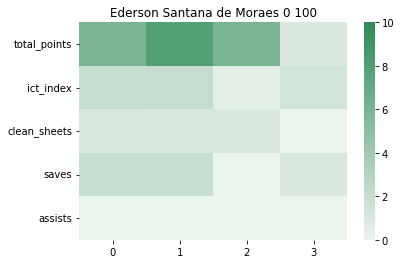

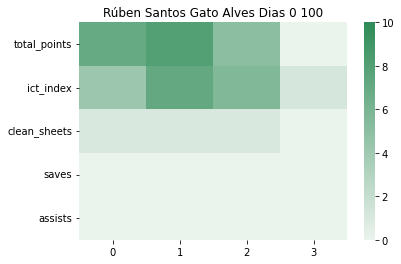

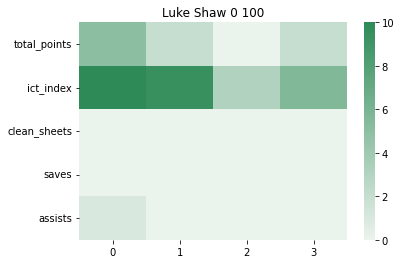

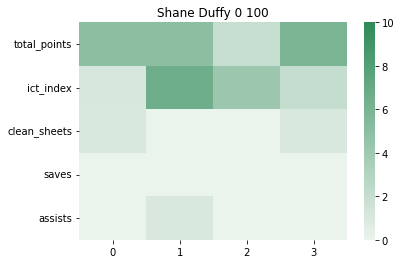

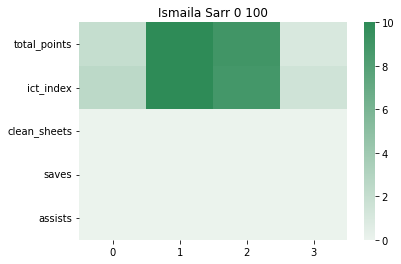

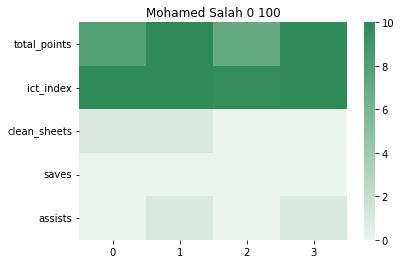

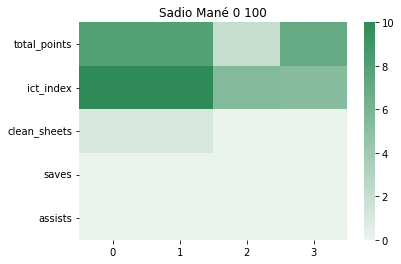

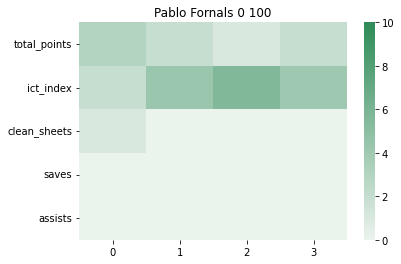

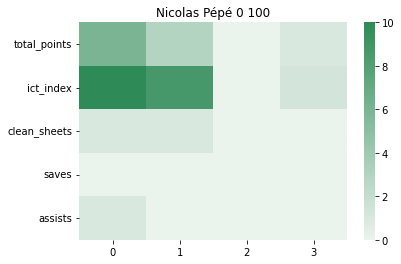

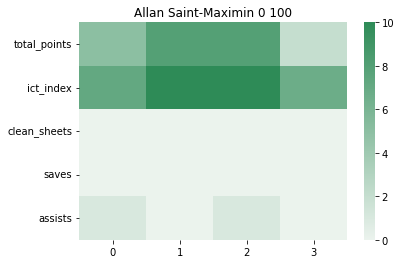

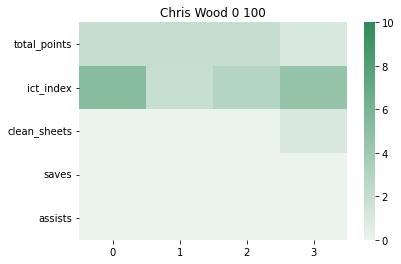

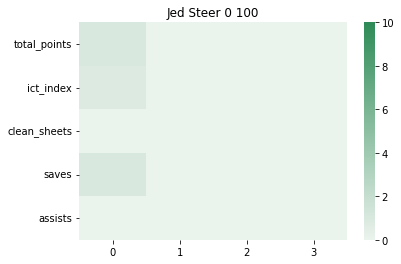

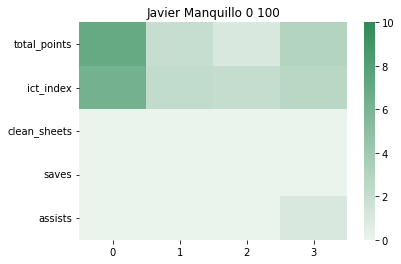

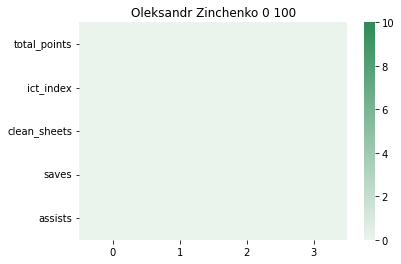

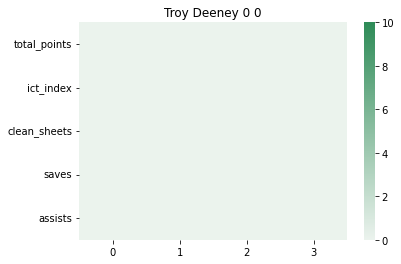

In [4]:
current_squad, non_squad = await get_current_squad(player_feature_names, window=agent.window, num_players=agent.num_players)
for player in current_squad:
    player.visualize()

## Use model to swap players

Player out Troy Deeney. To double trade  = False 


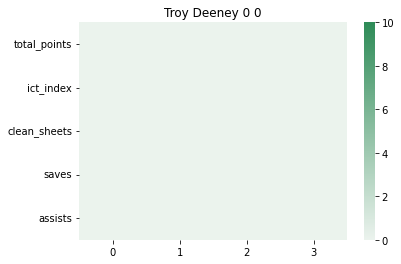

Player in Hee-Chan Hwang. To double trade  = False 


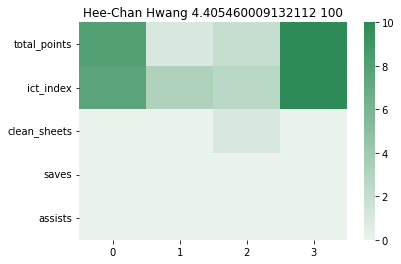

Player out Pablo Fornals. To double trade  = False 


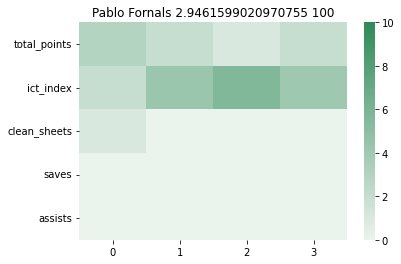

Player in Andros Townsend. To double trade  = False 


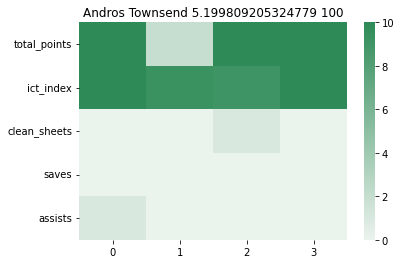

In [5]:
current_squad, non_squad = await agent.get_new_squad(player_feature_names)

## Set playing 11

Ederson Santana de Moraes
Rúben Santos Gato Alves Dias
Luke Shaw
Shane Duffy
Ismaila Sarr
Mohamed Salah
Sadio Mané
Nicolas Pépé
Allan Saint-Maximin
Chris Wood
Jed Steer
Javier Manquillo
Oleksandr Zinchenko
Hee-Chan Hwang
Andros Townsend
Ederson Santana de Moraes


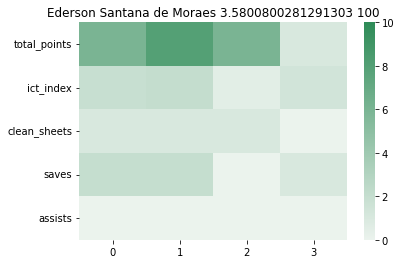

Rúben Santos Gato Alves Dias


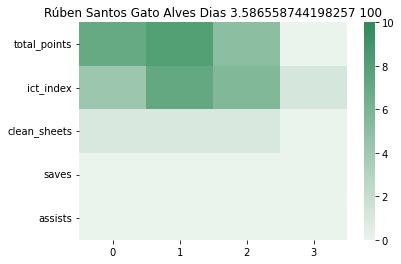

Shane Duffy


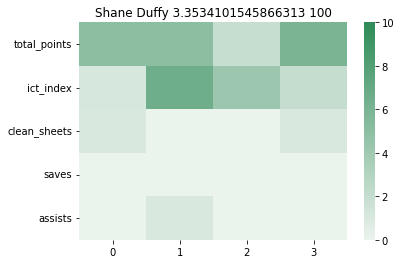

Luke Shaw


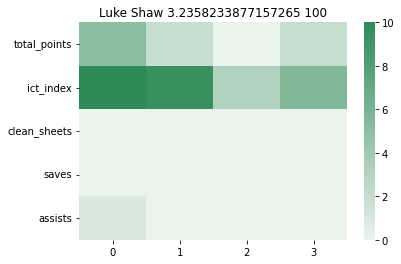

Mohamed Salah


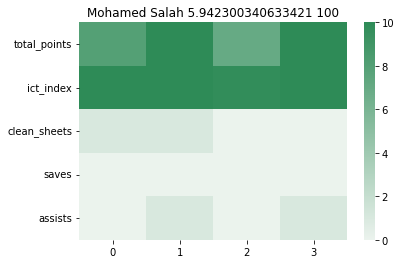

Andros Townsend


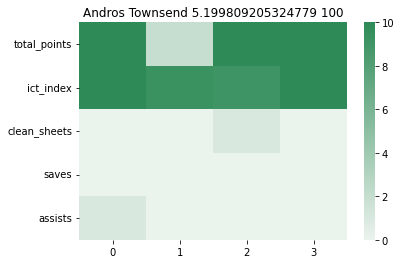

Sadio Mané


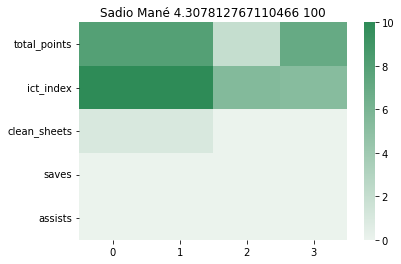

Ismaila Sarr


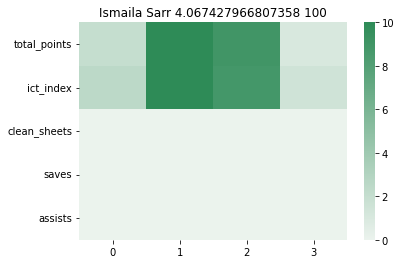

Allan Saint-Maximin


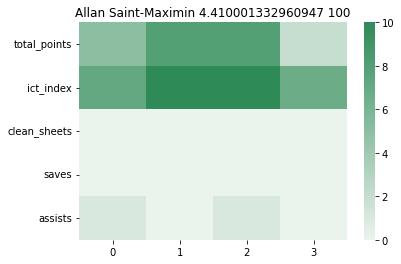

Hee-Chan Hwang


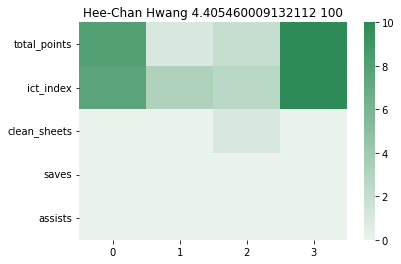

Chris Wood


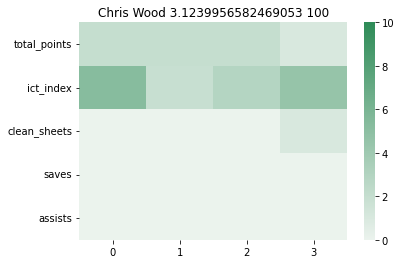

In [6]:
agent.set_playing_11(current_squad, visualize=True)

## Highlight top performers by position for this week





Goalkeeper
Tim Krul


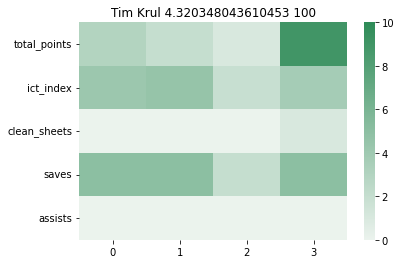

Alex McCarthy


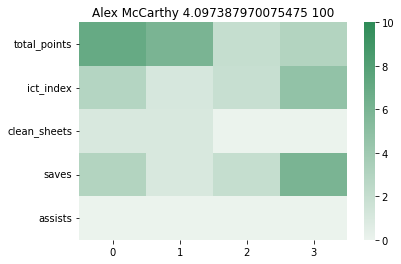

Emiliano Martínez


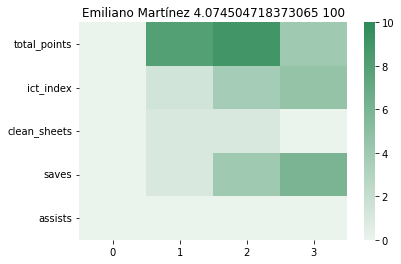

Illan Meslier


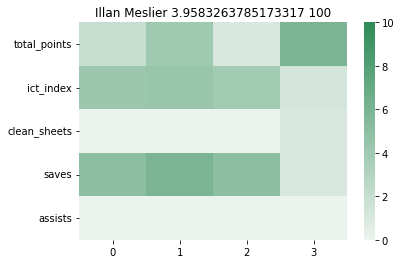

Aaron Ramsdale


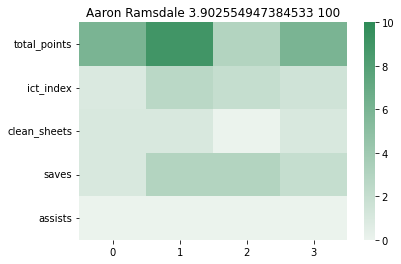










Defender
João Pedro Cavaco Cancelo


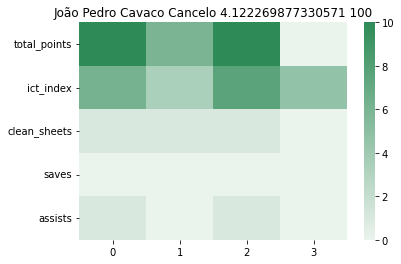

Marc Cucurella


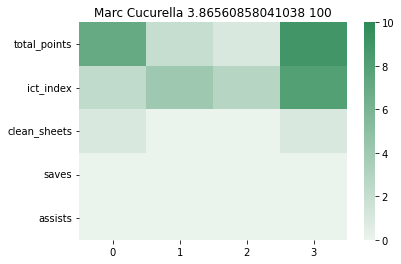

Antonio Rüdiger


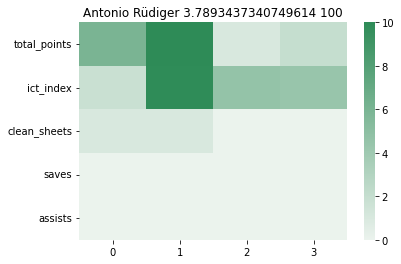

Ethan Pinnock


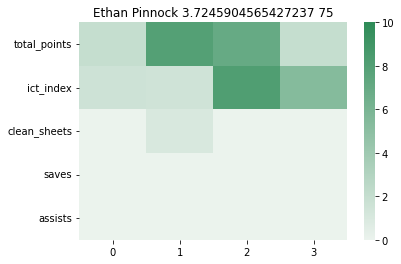

Lewis Dunk


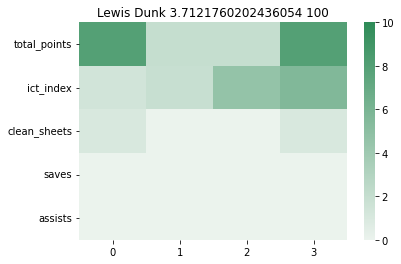










Midfielder
Mohamed Salah


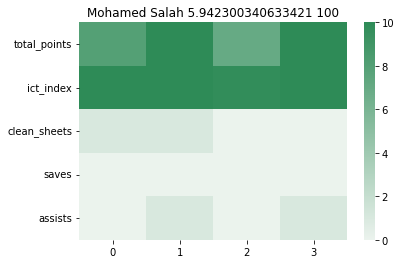

Andros Townsend


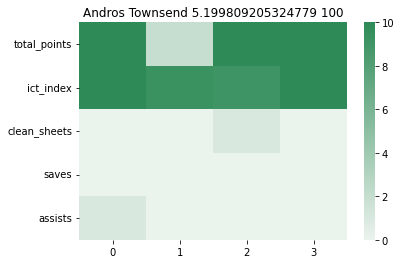

Leandro Trossard


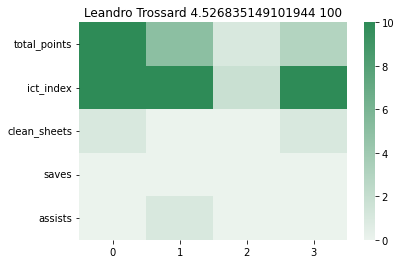

Bukayo Saka


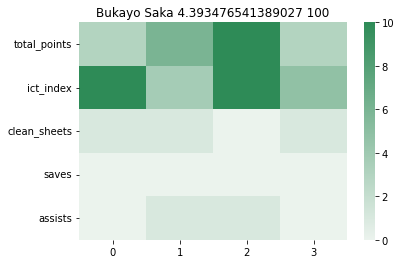

Raphael Dias Belloli


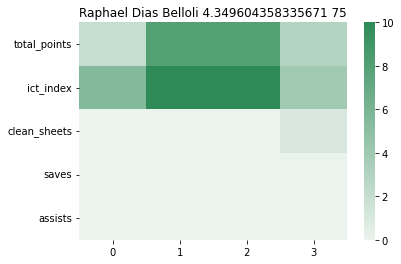










Forward
Jamie Vardy


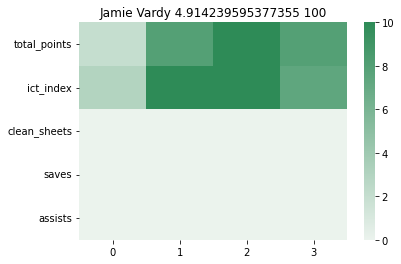

Allan Saint-Maximin


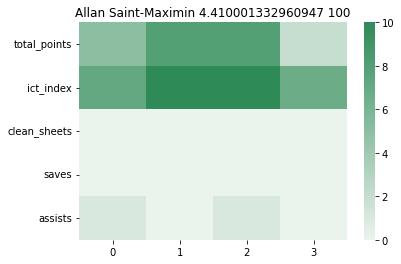

Hee-Chan Hwang


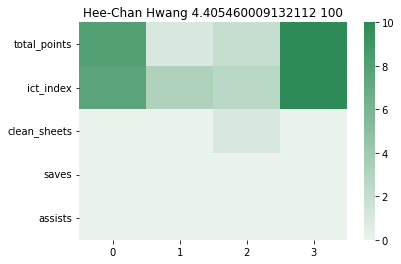

Pierre-Emerick Aubameyang


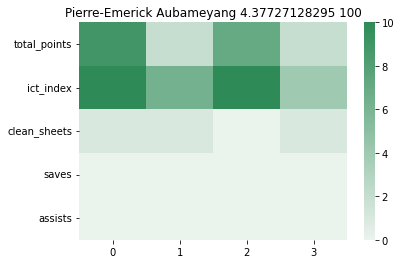

Cristiano Ronaldo dos Santos Aveiro


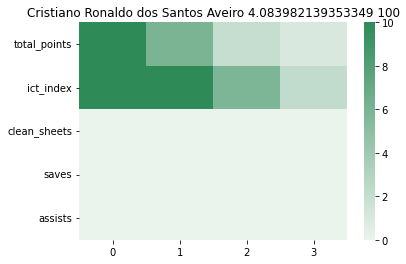

In [7]:
agent.show_top_performers(current_squad + non_squad, k=5)